# Bibliotecas

In [1]:
## Pandas 
import pandas as pd
import numpy as np
import seaborn as sns # Alternativa pra gerar gráficos
from sklearn.cluster import KMeans ## Agrupamento pela média das variáveis
import matplotlib.pyplot as plot
from sklearn.preprocessing import OrdinalEncoder # codificar variaveis categoricas
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler # Padronizar dados
from dfply import *
import joblib ## Salvar modelo como pickle
from sklearn.impute import SimpleImputer # imputação simples
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold ### funcionalidadde para separar os dados em treino e teste
from statsmodels.stats.outliers_influence import variance_inflation_factor # VIF
from scipy.stats import skew,randint #randint: sorteio # Assimetria  -- Para os modelos o ideal é ter preditores com pouca assimetria, mas isso não é extremamente importante
from sklearn.feature_selection import VarianceThreshold # Variancia nula -- Verifica se alguma variável tem variancia nula - O ideal é que não tenha esse tipo de variável nas com as preditoras pois elas não representam a variabilidade dos dados
from math import sqrt
import random # semente

#%pip install imbalanced-learn
#superamostragem  e subamostragem
#from imblearn.over_sampling import SVMSMOTE
#from imblearn.under_sampling import RandomUnderSampler

# modelo LASSO
from sklearn.linear_model  import LassoCV, LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold

# modelo de XGBoost
#!pip install xgboost
import xgboost  as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from bayes_opt import BayesianOptimization
from sklearn.feature_selection import SequentialFeatureSelector

# modelo de Regressão Logística
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm # ver o resumo do modelo

# modelo de Floresta Aleatória (Ramdon Forest)
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

# comparação de modelos
from sklearn.metrics import f1_score, precision_recall_curve, roc_auc_score, r2_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve , auc, mean_squared_error, mean_absolute_error,recall_score,precision_score,classification_report
#%pip install numpy==2.2
#%pip install ipywidgets
import shap #  Análise com SHAP
from scipy.special import expit  # sigmoid

import joblib ## Salvar modelo como pickle

##Visualização data frame pandas sem truncamento
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', None)

# permite a vizualição de números flutuantes com duas casas decimais
pd.set_option('display.float_format', '{:.2f}'.format)

np.random.seed(2025)
random.seed(2025)

# Base de Treino

### Análise

In [2]:
df_train=pd.read_csv("C:/Users/fernando.monteiro/deep-torch-example/KAB/Behavior_KAB/Desenvolvimento/Cluster/df_train.csv", sep=",", header=0, index_col=None)

In [3]:
X_train=df_train.copy()

In [4]:
X_train=X_train.drop(columns=["valor_da_parcela_aberto","limite_total","situacao_conta","media_atraso_dias","qtd_reneg_aberto_regular","limite_total_utilizado"])

In [5]:
X_train.head()

,sexo,idade,estado_civil,nacionalidade,tempo_relacionamento_kredilig_meses,canal_origem,media_meses_entre_contratos_combinado,qtd_contratos_fechado_regular,principal_total_fechado,qtd_parcelas_pagas,meses_ultimo_pagamento,meses_entre_primeiro_e_ultimo_pagamento,meses_entre_primeiro_e_ultimo_fechamento,valor_pago_nr,valor_principal_total_nr,FIN_valor_medio_entrada_nr,renda_valida_new,produtos,qtd_total_fechado_a_vista,mean_dias_maior_atraso,qtd_contratos,limite_total_primeiro_mes,limite_total_ultimo_mes,qtd_contratos_nr,qtd_cartao_antecipacao,qtd_parcelas_pagas_nr,ocupacao,grau_escolaridade_cat,regiao,tipo_cal_entre_contratos,tipo_valor_entrada,mean_atraso_possui_info,possui_contratos_a_vista,possui_antecipacao,principal_total,cpf_cnpj,inad_e_reneg,fx_renda_valida,fx_principal_total_nr,fx_principal_total,fx_ult_limite,Cluster
0,F,50,CASADO,BRASILEIRO,91.00,Fisico,0.00,0,1432.03,5,23.00,3.00,26.00,0.00,0.00,0.00,6300.00,EMPRESTIMO/FINANCIAMENTO,0,2.40,2,6750.00,6750.00,0,1.00,0,SERVIDOR_PUBLICO,TECNICO_SUPERIOR,Norte_Catarinense,Apenas_1_contrato,N_Paga_entrada,SIM,NAO,SIM,1432.03,84335335920.00,0,Acima de 3 SM,0,"R$1 mil a R$2,5 mil","R$5 mil a R$7,5 mil",3
1,F,59,SOLTEIRO,BRASILEIRO,19.00,Fisico,0.00,1,901.13,10,9.00,10.00,19.00,999.65,901.13,0.00,1730.00,FINANCIAMENTO,0,6.95,1,1000.00,1890.00,1,0.00,10,EMPREGADO_PRIVADO_AUTONOMO,ENSINO_MEDIO,Norte_Catarinense,Apenas_1_contrato,N_Paga_entrada,SIM,N_base_CARTAO,NAO,901.13,2437977961.00,0,"De 1 SM a 1,25 SM",Até R$2 mil,Até R$1 mil,"R$1 mil a R$2,5 mil",1
2,F,71,CASADO,BRASILEIRO,99.00,Fisico,1.75,3,4592.64,71,21.00,17.00,38.00,15072.70,24422.77,0.00,1412.00,EMPRESTIMO/FINANCIAMENTO,0,1.86,12,23100.00,25410.00,11,0.00,70,RENDA_PASSIVA_PENSAO,ENSINO_MEDIO,Sul_Catarinense,Contratos_dias_diferentes,N_Paga_entrada,SIM,NAO,NAO,24667.29,80042341949.00,1,Até 1 SM,Acima de R$20mil,Acima de R$20mil,Acima de R$20mil,4
3,F,47,CASADO,BRASILEIRO,105.00,Fisico,0.00,1,330.14,6,33.00,8.00,42.00,492.00,330.14,0.00,1484.00,FINANCIAMENTO,0,0.00,1,8600.00,8600.00,1,0.00,6,EMPREGADO_PRIVADO_AUTONOMO,ENSINO_MEDIO,Sul_Catarinense,Apenas_1_contrato,N_Paga_entrada,SIM,NAO,NAO,330.14,2638764973.00,0,Até 1 SM,Até R$2 mil,Até R$1 mil,"R$7,5 mil a R$10mil",0
4,F,41,UNIAO ESTAVEL,BRASILEIRO,78.00,Fisico,2.10,16,26072.21,219,0.00,42.00,42.00,26515.33,26735.05,0.00,1730.00,EMPRESTIMO/FINANCIAMENTO,0,11.72,35,10000.00,10000.00,19,0.00,194,EMPREGADO_PRIVADO_AUTONOMO,ENSINO_MEDIO,Norte_Catarinense,Contratos_dias_diferentes,N_Paga_entrada,SIM,NAO,NAO,34466.35,5649967938.00,0,"De 1 SM a 1,25 SM",Acima de R$20mil,Acima de R$20mil,"R$7,5 mil a R$10mil",2


In [6]:
X_train.describe()

,idade,tempo_relacionamento_kredilig_meses,media_meses_entre_contratos_combinado,qtd_contratos_fechado_regular,principal_total_fechado,qtd_parcelas_pagas,meses_ultimo_pagamento,meses_entre_primeiro_e_ultimo_pagamento,meses_entre_primeiro_e_ultimo_fechamento,valor_pago_nr,valor_principal_total_nr,FIN_valor_medio_entrada_nr,renda_valida_new,qtd_total_fechado_a_vista,mean_dias_maior_atraso,qtd_contratos,limite_total_primeiro_mes,limite_total_ultimo_mes,qtd_contratos_nr,qtd_cartao_antecipacao,qtd_parcelas_pagas_nr,principal_total,cpf_cnpj,inad_e_reneg,Cluster
count,215311.00,215311.00,215311.00,215311.00,215311.00,215311.00,215311.00,215311.00,215311.00,215311.00,215311.00,215311.00,215311.00,215311.00,215311.00,215311.00,215311.00,215311.00,215311.00,215311.00,215311.00,215311.00,215311.00,215311.00,215311.00
mean,51.12,53.98,4.28,2.24,4579.30,40.94,9.26,20.45,29.64,5997.10,5677.50,32.34,2078.52,0.15,7.97,4.94,6485.96,7721.67,3.74,0.22,33.80,7438.11,33950115379.07,0.30,1.73
std,15.93,30.32,5.44,3.48,7511.81,54.23,11.08,13.05,10.08,7821.06,6830.03,177.05,775.28,1.46,10.09,5.80,4740.34,5718.31,4.47,1.27,43.63,9828.32,32233605219.89,0.46,1.37
min,18.00,12.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,508.20,0.00,0.00,1.00,8.57,180.00,0.00,0.00,0.00,0.01,1468707.00,0.00,0.00
25%,39.00,28.00,0.00,0.00,764.79,10.00,1.00,10.00,21.00,1238.84,1520.00,0.00,1558.70,0.00,0.23,1.00,3000.00,3906.00,1.00,0.00,9.00,2021.01,5318523449.50,0.00,1.00
50%,52.00,48.00,2.84,1.00,2463.00,23.00,4.00,19.00,33.00,3552.65,3619.37,0.00,1888.00,0.00,3.58,3.00,5724.00,6804.00,2.00,0.00,20.00,4457.75,14782289707.00,0.00,1.00
75%,63.00,77.00,6.29,3.00,5648.91,51.00,16.00,33.00,39.00,7868.88,7436.07,0.00,2194.08,0.00,12.50,6.00,8520.00,10104.00,5.00,0.00,44.00,9214.03,63944636995.50,1.00,3.00
max,100.00,126.00,41.07,125.00,310660.49,1410.00,42.00,42.00,42.00,310434.77,289360.52,7200.00,26111.28,96.00,60.00,181.00,60000.00,100000.00,145.00,51.00,1410.00,329851.85,99997908953.00,1.00,4.00


In [7]:
# Porcentagem de valores faltantes
(X_train.isnull().sum()).sort_values(ascending=False)

sexo                                        0
idade                                       0
estado_civil                                0
nacionalidade                               0
tempo_relacionamento_kredilig_meses         0
canal_origem                                0
media_meses_entre_contratos_combinado       0
qtd_contratos_fechado_regular               0
principal_total_fechado                     0
qtd_parcelas_pagas                          0
meses_ultimo_pagamento                      0
meses_entre_primeiro_e_ultimo_pagamento     0
meses_entre_primeiro_e_ultimo_fechamento    0
valor_pago_nr                               0
valor_principal_total_nr                    0
FIN_valor_medio_entrada_nr                  0
renda_valida_new                            0
produtos                                    0
qtd_total_fechado_a_vista                   0
mean_dias_maior_atraso                      0
qtd_contratos                               0
limite_total_primeiro_mes         

In [8]:
#Tipos
tipos = {
"sexo": "category",
"estado_civil": "category",
"grau_escolaridade_cat": "category",
"ocupacao": "category",
"nacionalidade": "category",
"canal_origem": "category",
"produtos": "category",
"Cluster": "category",
"tipo_cal_entre_contratos": "category",
"possui_contratos_a_vista": "category",
"tipo_valor_entrada": "category",
"mean_atraso_possui_info": "category",
"fx_renda_valida": "category",
"fx_ult_limite": "category",
"fx_principal_total":"category",
"fx_principal_total_nr":"category",
"regiao": "category",
"possui_antecipacao":"category",}

# conversão
X_train = X_train.astype({k: v for k, v in tipos.items()})

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215311 entries, 0 to 215310
Data columns (total 42 columns):
 #   Column                                    Non-Null Count   Dtype   
---  ------                                    --------------   -----   
 0   sexo                                      215311 non-null  category
 1   idade                                     215311 non-null  int64   
 2   estado_civil                              215311 non-null  category
 3   nacionalidade                             215311 non-null  category
 4   tempo_relacionamento_kredilig_meses       215311 non-null  float64 
 5   canal_origem                              215311 non-null  category
 6   media_meses_entre_contratos_combinado     215311 non-null  float64 
 7   qtd_contratos_fechado_regular             215311 non-null  int64   
 8   principal_total_fechado                   215311 non-null  float64 
 9   qtd_parcelas_pagas                        215311 non-null  int64   
 10  meses_ul

In [10]:
# Frequência da variável target
X_train.Cluster.value_counts()
X_train.inad_e_reneg.value_counts()

inad_e_reneg
0    150674
1     64637
Name: count, dtype: int64

In [11]:
# Amostragem
#Variável de interesse
y_train = X_train >> select(X.inad_e_reneg)

# Remover a variável resposta do conjunto de dados
X_train.drop(['inad_e_reneg'],axis=1, inplace=True)

In [12]:
# Frequência da variável target no treino
print(y_train.value_counts()) #qtd treino

inad_e_reneg
0               150674
1                64637
Name: count, dtype: int64


In [13]:
ids_train = X_train["cpf_cnpj"]  
X_train = X_train.drop(columns=["cpf_cnpj"])
#ids_test = X_test["cpf_cnpj"]  
#X_test = X_test.drop(columns=["cpf_cnpj"])

### Base de treino - Pré processamento

In [14]:
# One hot encoding
X_train_dummy=pd.get_dummies(X_train).astype(int)

In [15]:
X_train_dummy.head(10)

,idade,tempo_relacionamento_kredilig_meses,media_meses_entre_contratos_combinado,qtd_contratos_fechado_regular,principal_total_fechado,qtd_parcelas_pagas,meses_ultimo_pagamento,meses_entre_primeiro_e_ultimo_pagamento,meses_entre_primeiro_e_ultimo_fechamento,valor_pago_nr,valor_principal_total_nr,FIN_valor_medio_entrada_nr,renda_valida_new,qtd_total_fechado_a_vista,mean_dias_maior_atraso,qtd_contratos,limite_total_primeiro_mes,limite_total_ultimo_mes,qtd_contratos_nr,qtd_cartao_antecipacao,qtd_parcelas_pagas_nr,principal_total,sexo_F,sexo_M,estado_civil_CASADO,estado_civil_DIVORCIADO,estado_civil_SOLTEIRO,estado_civil_UNIAO ESTAVEL,estado_civil_VIUVO,nacionalidade_BRASILEIRO,nacionalidade_ESTRANGEIRO,canal_origem_Digital,canal_origem_Fisico,produtos_EMPRESTIMO,produtos_EMPRESTIMO/FINANCIAMENTO,produtos_FINANCIAMENTO,ocupacao_APOSENTADO,ocupacao_EMPREGADO_PRIVADO_AUTONOMO,ocupacao_OUTROS,ocupacao_RENDA_PASSIVA_PENSAO,ocupacao_SERVIDOR_PUBLICO,grau_escolaridade_cat_ATE_FUNDAMENTAL,grau_escolaridade_cat_ENSINO_MEDIO,grau_escolaridade_cat_TECNICO_SUPERIOR,regiao_Fora_SC,regiao_Grande_Florianópolis,regiao_Norte_Catarinense,regiao_Oeste_Catarinense,regiao_Serrana,regiao_Sul_Catarinense,regiao_Vale_do_Itajaí,tipo_cal_entre_contratos_Apenas_1_contrato,tipo_cal_entre_contratos_Contratos_dias_diferentes,tipo_cal_entre_contratos_Contratos_mesmo_dia,tipo_valor_entrada_N_Paga_entrada,tipo_valor_entrada_Paga_entrada,mean_atraso_possui_info_NAO,mean_atraso_possui_info_SIM,possui_contratos_a_vista_NAO,possui_contratos_a_vista_N_base_CARTAO,possui_contratos_a_vista_SIM,possui_antecipacao_NAO,possui_antecipacao_SIM,fx_renda_valida_Acima de 3 SM,fx_renda_valida_Até 1 SM,"fx_renda_valida_De 1 SM a 1,25 SM","fx_renda_valida_De 1,25 SM a 1,5 SM","fx_renda_valida_De 1,5 SM a 2 SM",fx_renda_valida_De 2 SM a 3 SM,fx_principal_total_nr_0,fx_principal_total_nr_Acima de R$20mil,fx_principal_total_nr_Até R$2 mil,fx_principal_total_nr_R$10 mil a R$20mil,fx_principal_total_nr_R$2 mil a R$5mil,fx_principal_total_nr_R$5 mil a R$10mil,fx_principal_total_Acima de R$20mil,fx_principal_total_Até R$1 mil,"fx_principal_total_R$1 mil a R$2,5 mil",fx_principal_total_R$10 mil a R$15mil,fx_principal_total_R$15 mil a R$20mil,"fx_principal_total_R$2,5 mil a R$5 mil","fx_principal_total_R$5 mil a R$7,5 mil","fx_principal_total_R$7,5 mil a R$10mil",fx_ult_limite_Acima de R$20mil,fx_ult_limite_Até R$1 mil,"fx_ult_limite_R$1 mil a R$2,5 mil",fx_ult_limite_R$10 mil a R$15mil,fx_ult_limite_R$15 mil a R$20mil,"fx_ult_limite_R$2,5 mil a R$5 mil","fx_ult_limite_R$5 mil a R$7,5 mil","fx_ult_limite_R$7,5 mil a R$10mil",Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4
0,50,91,0,0,1432,5,23,3,26,0,0,0,6300,0,2,2,6750,6750,0,1,0,1432,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,59,19,0,1,901,10,9,10,19,999,901,0,1730,0,6,1,1000,1890,1,0,10,901,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,71,99,1,3,4592,71,21,17,38,15072,24422,0,1412,0,1,12,23100,25410,11,0,70,24667,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,47,105,0,1,330,6,33,8,42,492,330,0,1484,0,0,1,8600,8600,1,0,6,330,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
4,41,78,2,16,26072,219,0,42,42,26515,26735,0,1730,0,11,35,10000,10000,19,0,194,34466,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
5,47,15,2,0,0,8,9,6,15,820,2162,0,1646,0,7,3,1800,2835,2,0,7,2326,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
6,41,76,0,1,604,4,

In [16]:
X_train_dummy.columns.to_list()

['idade',
 'tempo_relacionamento_kredilig_meses',
 'media_meses_entre_contratos_combinado',
 'qtd_contratos_fechado_regular',
 'principal_total_fechado',
 'qtd_parcelas_pagas',
 'meses_ultimo_pagamento',
 'meses_entre_primeiro_e_ultimo_pagamento',
 'meses_entre_primeiro_e_ultimo_fechamento',
 'valor_pago_nr',
 'valor_principal_total_nr',
 'FIN_valor_medio_entrada_nr',
 'renda_valida_new',
 'qtd_total_fechado_a_vista',
 'mean_dias_maior_atraso',
 'qtd_contratos',
 'limite_total_primeiro_mes',
 'limite_total_ultimo_mes',
 'qtd_contratos_nr',
 'qtd_cartao_antecipacao',
 'qtd_parcelas_pagas_nr',
 'principal_total',
 'sexo_F',
 'sexo_M',
 'estado_civil_CASADO',
 'estado_civil_DIVORCIADO',
 'estado_civil_SOLTEIRO',
 'estado_civil_UNIAO ESTAVEL',
 'estado_civil_VIUVO',
 'nacionalidade_BRASILEIRO',
 'nacionalidade_ESTRANGEIRO',
 'canal_origem_Digital',
 'canal_origem_Fisico',
 'produtos_EMPRESTIMO',
 'produtos_EMPRESTIMO/FINANCIAMENTO',
 'produtos_FINANCIAMENTO',
 'ocupacao_APOSENTADO',
 'ocup

##### Correlação com a variável target

In [17]:
# Seleção de variáveis
X_train_d_select=X_train_dummy[['idade',
 'tempo_relacionamento_kredilig_meses',
 'media_meses_entre_contratos_combinado',
 'qtd_contratos_fechado_regular',
 'principal_total_fechado',
 'qtd_parcelas_pagas',
 'meses_ultimo_pagamento',
 'meses_entre_primeiro_e_ultimo_pagamento',
 'meses_entre_primeiro_e_ultimo_fechamento',
 'valor_pago_nr',
 'valor_principal_total_nr',
 'FIN_valor_medio_entrada_nr',
 'renda_valida_new',
 'qtd_total_fechado_a_vista',
 'mean_dias_maior_atraso',
 'qtd_contratos',
 'limite_total_primeiro_mes',
 'limite_total_ultimo_mes',
 'qtd_contratos_nr',
 'qtd_cartao_antecipacao',
 'qtd_parcelas_pagas_nr',
 'principal_total',
 'sexo_F',
 'sexo_M',
 'estado_civil_CASADO',
 'estado_civil_DIVORCIADO',
 'estado_civil_SOLTEIRO',
 'estado_civil_UNIAO ESTAVEL',
 'estado_civil_VIUVO',
 'nacionalidade_BRASILEIRO',
 'nacionalidade_ESTRANGEIRO',
 'canal_origem_Digital',
 'canal_origem_Fisico',
 'produtos_EMPRESTIMO',
 'produtos_EMPRESTIMO/FINANCIAMENTO',
 'produtos_FINANCIAMENTO',
 'ocupacao_APOSENTADO',
 'ocupacao_EMPREGADO_PRIVADO_AUTONOMO',
 'ocupacao_OUTROS',
 'ocupacao_RENDA_PASSIVA_PENSAO',
 'ocupacao_SERVIDOR_PUBLICO',
 'grau_escolaridade_cat_ATE_FUNDAMENTAL',
 'grau_escolaridade_cat_ENSINO_MEDIO',
 'grau_escolaridade_cat_TECNICO_SUPERIOR',
 'regiao_Fora_SC',
 'regiao_Grande_Florianópolis',
 'regiao_Norte_Catarinense',
 'regiao_Oeste_Catarinense',
 'regiao_Serrana',
 'regiao_Sul_Catarinense',
 'regiao_Vale_do_Itajaí',
 'tipo_cal_entre_contratos_Apenas_1_contrato',
 'tipo_cal_entre_contratos_Contratos_dias_diferentes',
 'tipo_cal_entre_contratos_Contratos_mesmo_dia',
 'tipo_valor_entrada_N_Paga_entrada',
 'tipo_valor_entrada_Paga_entrada',
 'mean_atraso_possui_info_NAO',
 'mean_atraso_possui_info_SIM',
 'possui_contratos_a_vista_NAO',
 'possui_contratos_a_vista_N_base_CARTAO',
 'possui_contratos_a_vista_SIM',
 'possui_antecipacao_NAO',
 'possui_antecipacao_SIM',
 'fx_renda_valida_Acima de 3 SM',
 'fx_renda_valida_Até 1 SM',
 'fx_renda_valida_De 1 SM a 1,25 SM',
 'fx_renda_valida_De 1,25 SM a 1,5 SM',
 'fx_renda_valida_De 1,5 SM a 2 SM',
 'fx_renda_valida_De 2 SM a 3 SM',
 'fx_principal_total_nr_0',
 'fx_principal_total_nr_Acima de R$20mil',
 'fx_principal_total_nr_Até R$2 mil',
 'fx_principal_total_nr_R$10 mil a R$20mil',
 'fx_principal_total_nr_R$2 mil a R$5mil',
 'fx_principal_total_nr_R$5 mil a R$10mil',
 'fx_principal_total_Acima de R$20mil',
 'fx_principal_total_Até R$1 mil',
 'fx_principal_total_R$1 mil a R$2,5 mil',
 'fx_principal_total_R$10 mil a R$15mil',
 'fx_principal_total_R$15 mil a R$20mil',
 'fx_principal_total_R$2,5 mil a R$5 mil',
 'fx_principal_total_R$5 mil a R$7,5 mil',
 'fx_principal_total_R$7,5 mil a R$10mil',
 'fx_ult_limite_Acima de R$20mil',
 'fx_ult_limite_Até R$1 mil',
 'fx_ult_limite_R$1 mil a R$2,5 mil',
 'fx_ult_limite_R$10 mil a R$15mil',
 'fx_ult_limite_R$15 mil a R$20mil',
 'fx_ult_limite_R$2,5 mil a R$5 mil',
 'fx_ult_limite_R$5 mil a R$7,5 mil',
 'fx_ult_limite_R$7,5 mil a R$10mil',
 'Cluster_0',
 'Cluster_1',
 'Cluster_2',
 'Cluster_3',
 'Cluster_4']]

In [18]:
X_train_d_select.drop(columns=['qtd_total_fechado_a_vista', # alta correlação
                               "FIN_valor_medio_entrada_nr", # alta correlação
                               "principal_total_fechado", # alta correlação e pouca importancia
                               "mean_atraso_possui_info_SIM", # VIF alto e alta assimetria
                               'mean_atraso_possui_info_NAO',
                               "qtd_parcelas_pagas", # substituida por qtd_parcelas_pagas_nr
                               #'valor_principal_total_nr',# alta correlação
                               "tipo_cal_entre_contratos_Contratos_dias_diferentes", # alta correlação e assimetria
                               'tipo_cal_entre_contratos_Contratos_mesmo_dia',
                               "meses_entre_primeiro_e_ultimo_fechamento", # VIF alto
                               "limite_total_primeiro_mes",# alta correlação
                               'meses_entre_primeiro_e_ultimo_pagamento', #VIF alta e menos importancia que a variável "tempo_relacionamento_kredilig_meses"
                               #'qtd_contratos_fechado_regular', #Vazamento de informação IV > 0.50
                               #'produtos_EMPRESTIMO/FINANCIAMENTO', 
                               'Cluster_0',
                               'Cluster_1',
                               'Cluster_2',
                               'Cluster_3',
                               'Cluster_4',
                               'possui_contratos_a_vista_N_base_CARTAO',
                               'possui_contratos_a_vista_NAO',
                               'limite_total_ultimo_mes', # categorização da renda
                               "nacionalidade_BRASILEIRO",# assimetria alta
                               'canal_origem_Digital',# Alto VIF
                                'fx_ult_limite_Acima de R$20mil',
                                'fx_ult_limite_Até R$1 mil', # Variável importante, mas possui relatório independente
                                'fx_ult_limite_R$1 mil a R$2,5 mil',# Variável importante, mas possui relatório independente
                                'fx_ult_limite_R$10 mil a R$15mil',# Variável importante, mas possui relatório independente
                                'fx_ult_limite_R$15 mil a R$20mil',# Variável importante, mas possui relatório independente
                                'fx_ult_limite_R$2,5 mil a R$5 mil',# Variável importante, mas possui relatório independente
                                'fx_ult_limite_R$5 mil a R$7,5 mil',# Variável importante, mas possui relatório independente
                                'fx_ult_limite_R$7,5 mil a R$10mil',# Variável importante, mas possui relatório independente
                                'qtd_cartao_antecipacao',# Corr alto com possui antecipação
                                'principal_total', # Corr ALTO com principal_total_nr
                                'qtd_contratos',# Corr ALTO com qtd_contratos_nr,
                                'fx_principal_total_Acima de R$20mil',
                                'fx_principal_total_Até R$1 mil',# Corr ALTO com principal_total_nr,
                                'fx_principal_total_R$1 mil a R$2,5 mil',
                                'fx_principal_total_R$10 mil a R$15mil',
                                'fx_principal_total_R$15 mil a R$20mil',
                                'fx_principal_total_R$2,5 mil a R$5 mil',
                                'fx_principal_total_R$5 mil a R$7,5 mil',
                                'fx_principal_total_R$7,5 mil a R$10mil',
                                'renda_valida_new',# categorização da renda
                                "possui_antecipacao_SIM", # Precisa de ajustes
                                "possui_antecipacao_NAO",
                                'tipo_valor_entrada_N_Paga_entrada',
                                'sexo_F',
                                'tipo_cal_entre_contratos_Apenas_1_contrato',
                                'mean_atraso_possui_info_NAO',
                                #'fx_principal_total_nr_0',
                                #'fx_principal_total_nr_Acima de R$20mil',
                                #'fx_principal_total_nr_Até R$2 mil',
                                #'fx_principal_total_nr_R$10 mil a R$20mil',
                                #'fx_principal_total_nr_R$2 mil a R$5mil',
                                #'fx_principal_total_nr_R$5 mil a R$10mil',
                               ], inplace=True, errors='ignore')

In [19]:
# Correlação
# Pearson
df_corr = X_train_d_select.copy()
df_corr['target'] = y_train

correlacoes = df_corr.corr(numeric_only=True)['target'].drop('target').sort_values(key=abs, ascending=False)
print("Correlação com inad_reneg")
print(correlacoes)

Correlação com inad_reneg
meses_ultimo_pagamento                      0.29
produtos_FINANCIAMENTO                     -0.27
mean_dias_maior_atraso                      0.23
idade                                      -0.20
media_meses_entre_contratos_combinado      -0.20
produtos_EMPRESTIMO                         0.17
canal_origem_Fisico                        -0.15
produtos_EMPRESTIMO/FINANCIAMENTO           0.15
qtd_contratos_fechado_regular              -0.15
ocupacao_APOSENTADO                        -0.13
fx_principal_total_nr_0                     0.11
ocupacao_EMPREGADO_PRIVADO_AUTONOMO         0.11
valor_pago_nr                              -0.11
valor_principal_total_nr                   -0.10
tipo_valor_entrada_Paga_entrada            -0.09
regiao_Fora_SC                              0.07
tempo_relacionamento_kredilig_meses        -0.07
estado_civil_SOLTEIRO                       0.07
fx_principal_total_nr_R$10 mil a R$20mil   -0.07
ocupacao_OUTROS                            

In [20]:
'''X_train_d_select=X_train_d_select[['idade',
 'media_meses_entre_contratos_combinado',
 'meses_ultimo_pagamento',
 #'meses_entre_primeiro_e_ultimo_pagamento',
 'valor_pago_nr', # Voltar e analisar
 #'renda_valida_new',
 'mean_dias_maior_atraso',
 'qtd_contratos',
 'sexo_M',
 #'estado_civil_DIVORCIADO',
 'estado_civil_SOLTEIRO',
 #'estado_civil_UNIAO ESTAVEL',
 #'estado_civil_VIUVO',
 'canal_origem_Fisico', # Voltar e analisar
 #'ocupacao_EMPREGADO_PRIVADO_AUTONOMO',
 #'ocupacao_OUTROS',
 'ocupacao_RENDA_PASSIVA_PENSAO',
 'ocupacao_SERVIDOR_PUBLICO',
 'grau_escolaridade_cat_ENSINO_MEDIO',
 'grau_escolaridade_cat_TECNICO_SUPERIOR',
 'regiao_Grande_Florianópolis',
 'regiao_Norte_Catarinense',
 #'regiao_Oeste_Catarinense',
 'regiao_Serrana',
 'regiao_Sul_Catarinense',
 #'regiao_Vale_do_Itajaí',
 'possui_contratos_a_vista_SIM',
 'tipo_valor_entrada_Paga_entrada',
 'fx_renda_valida_Até 1 SM',
# 'fx_renda_valida_De 1 SM a 1,25 SM',
 'fx_renda_valida_De 1,25 SM a 1,5 SM',
 'fx_renda_valida_De 1,5 SM a 2 SM',
 'fx_renda_valida_De 2 SM a 3 SM',
 # 'fx_ult_limite_Até R$1 mil',
 #'fx_ult_limite_R$1 mil a R$2,5 mil',
 #'fx_ult_limite_R$10 mil a R$15mil',
 'fx_ult_limite_R$15 mil a R$20mil',
 'fx_ult_limite_R$2,5 mil a R$5 mil',
 #'fx_ult_limite_R$5 mil a R$7,5 mil',
 #'fx_ult_limite_R$7,5 mil a R$10mil',
 'fx_principal_total_nr_Acima de R$20mil',
 'fx_principal_total_nr_Até R$2 mil',
 'fx_principal_total_nr_R$10 mil a R$20mil',
 'fx_principal_total_nr_R$2 mil a R$5mil',
 'fx_principal_total_nr_R$5 mil a R$10mil',
 ]]'''

'''# VIF
pd.set_option('display.max_rows', None)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_d_select.columns
  
vif_data["VIF"] = [variance_inflation_factor(X_train_d_select.values, i)
                          for i in range(len(X_train_d_select.columns))]
print(vif_data.sort_values(by=['VIF'], ascending=False))'''

'# VIF\npd.set_option(\'display.max_rows\', None)\nvif_data = pd.DataFrame()\nvif_data["Feature"] = X_train_d_select.columns\n  \nvif_data["VIF"] = [variance_inflation_factor(X_train_d_select.values, i)\n                          for i in range(len(X_train_d_select.columns))]\nprint(vif_data.sort_values(by=[\'VIF\'], ascending=False))'

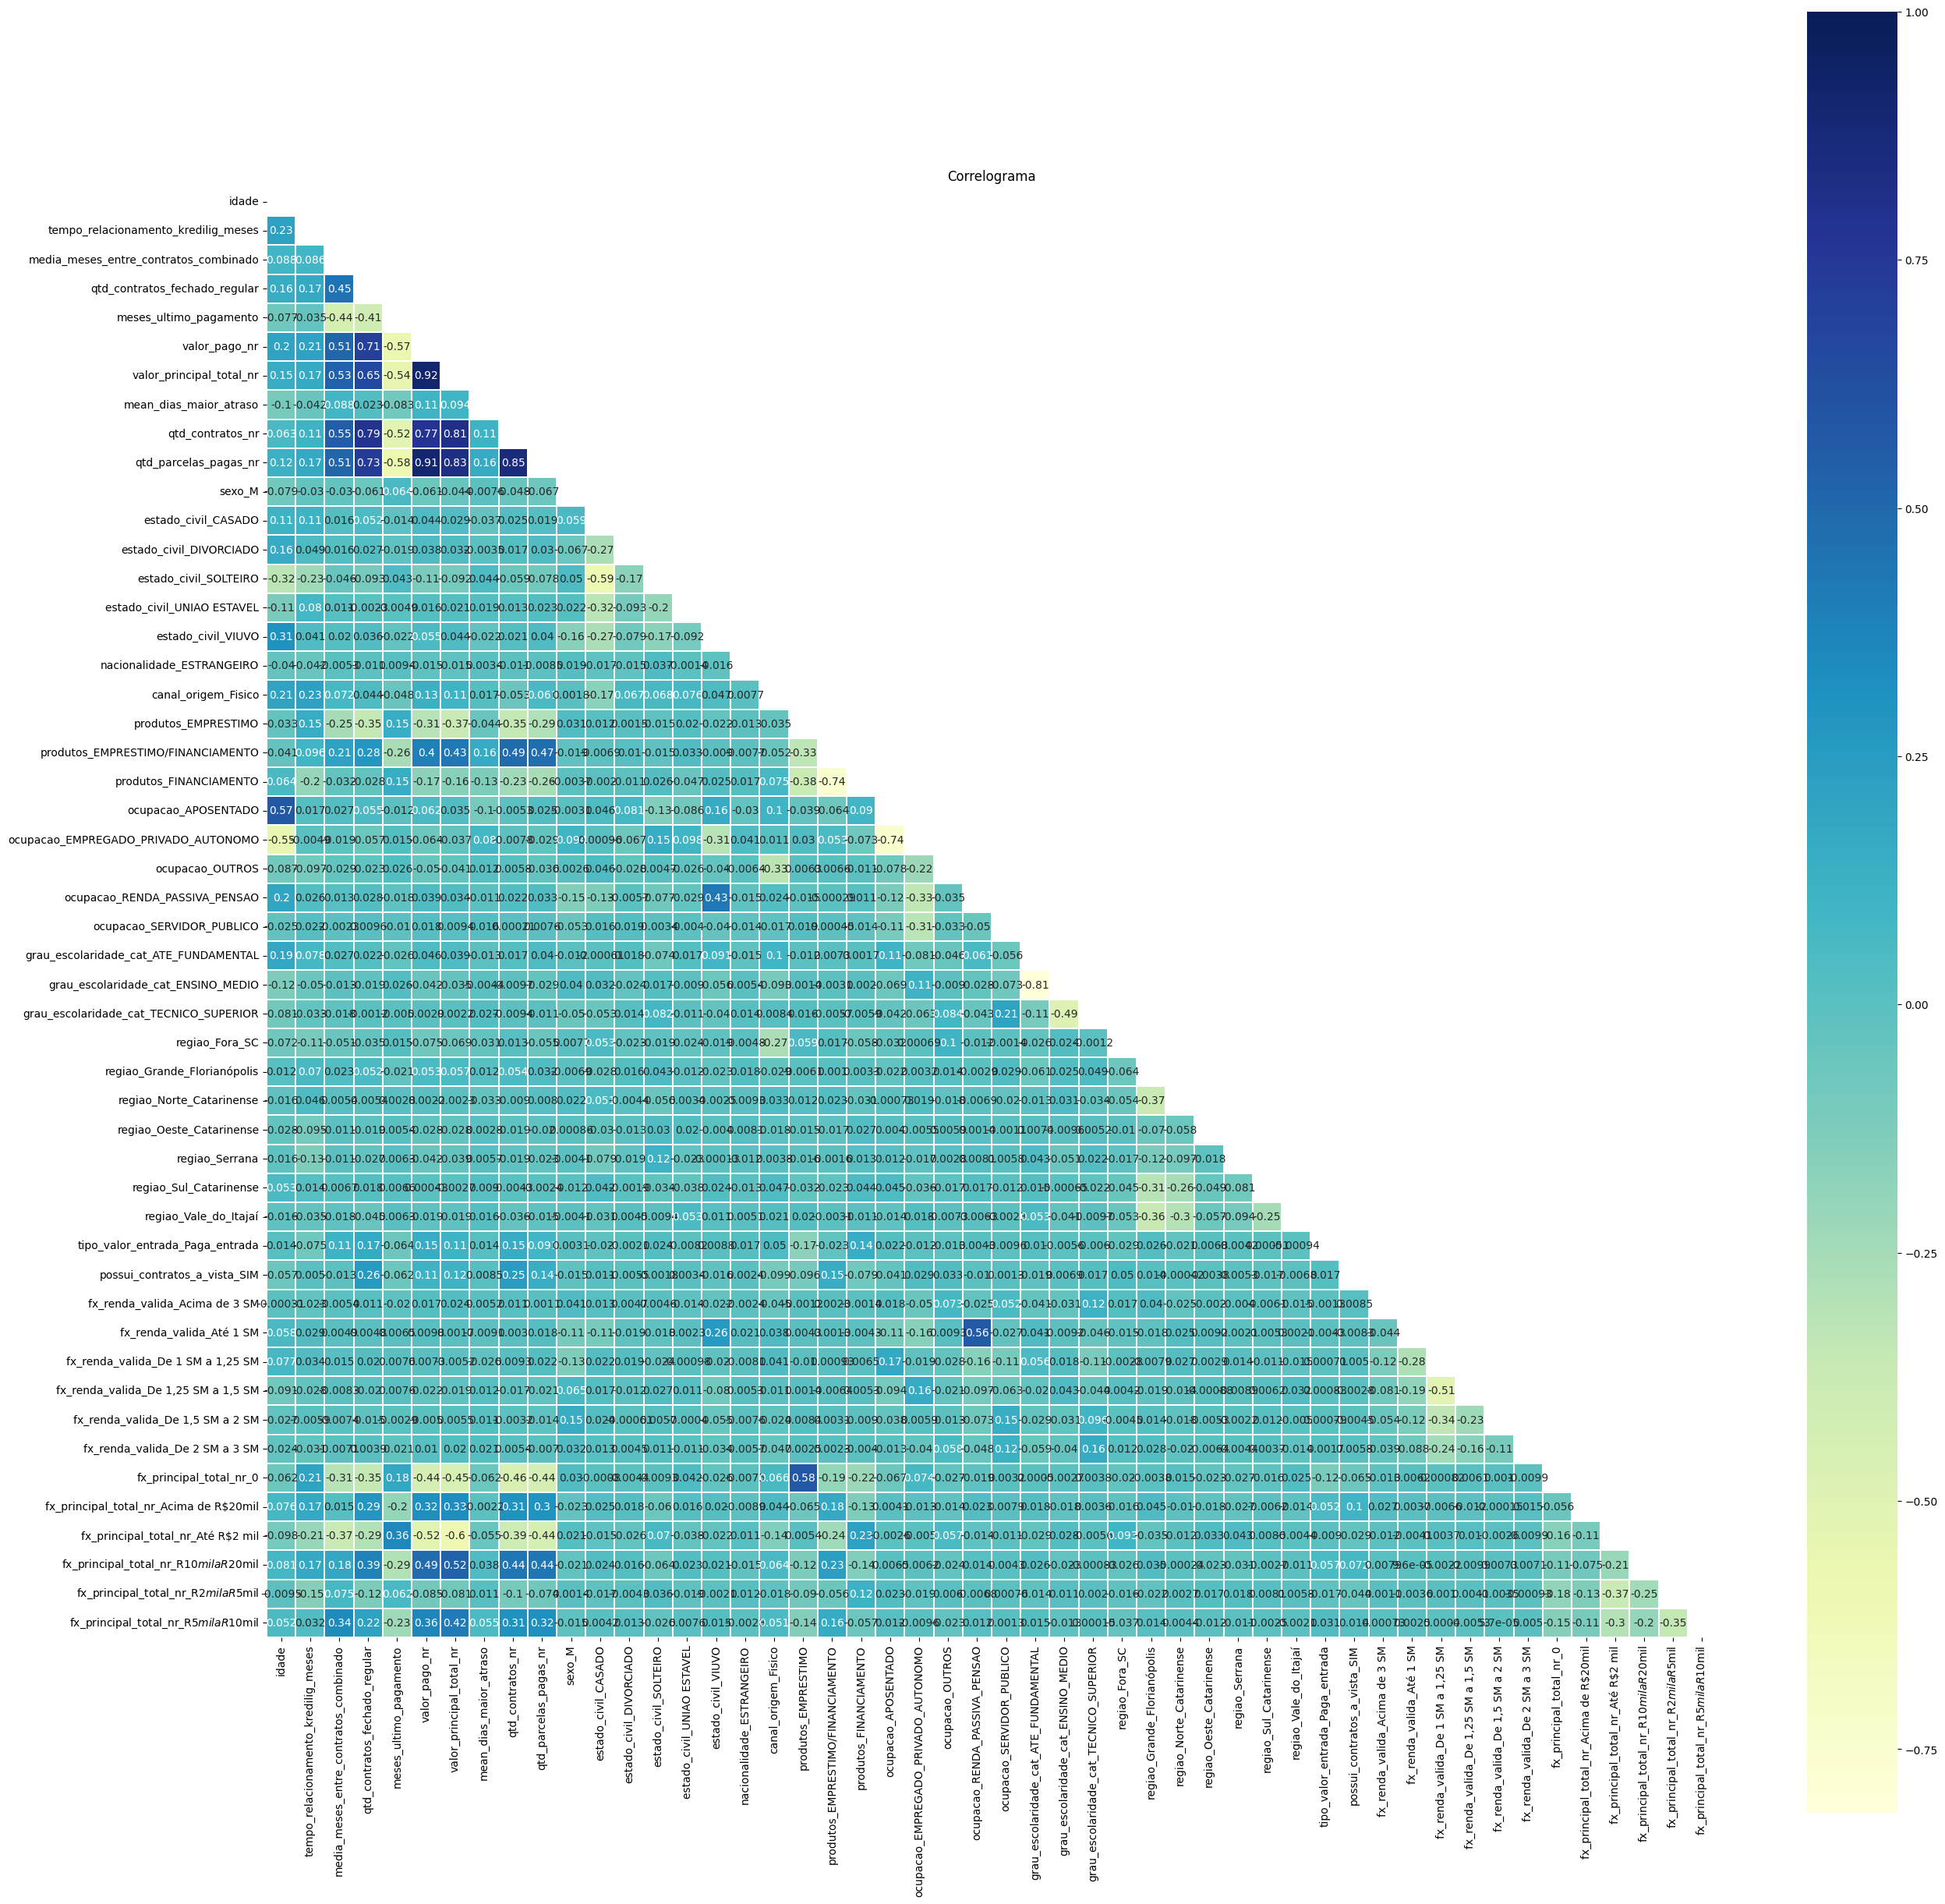

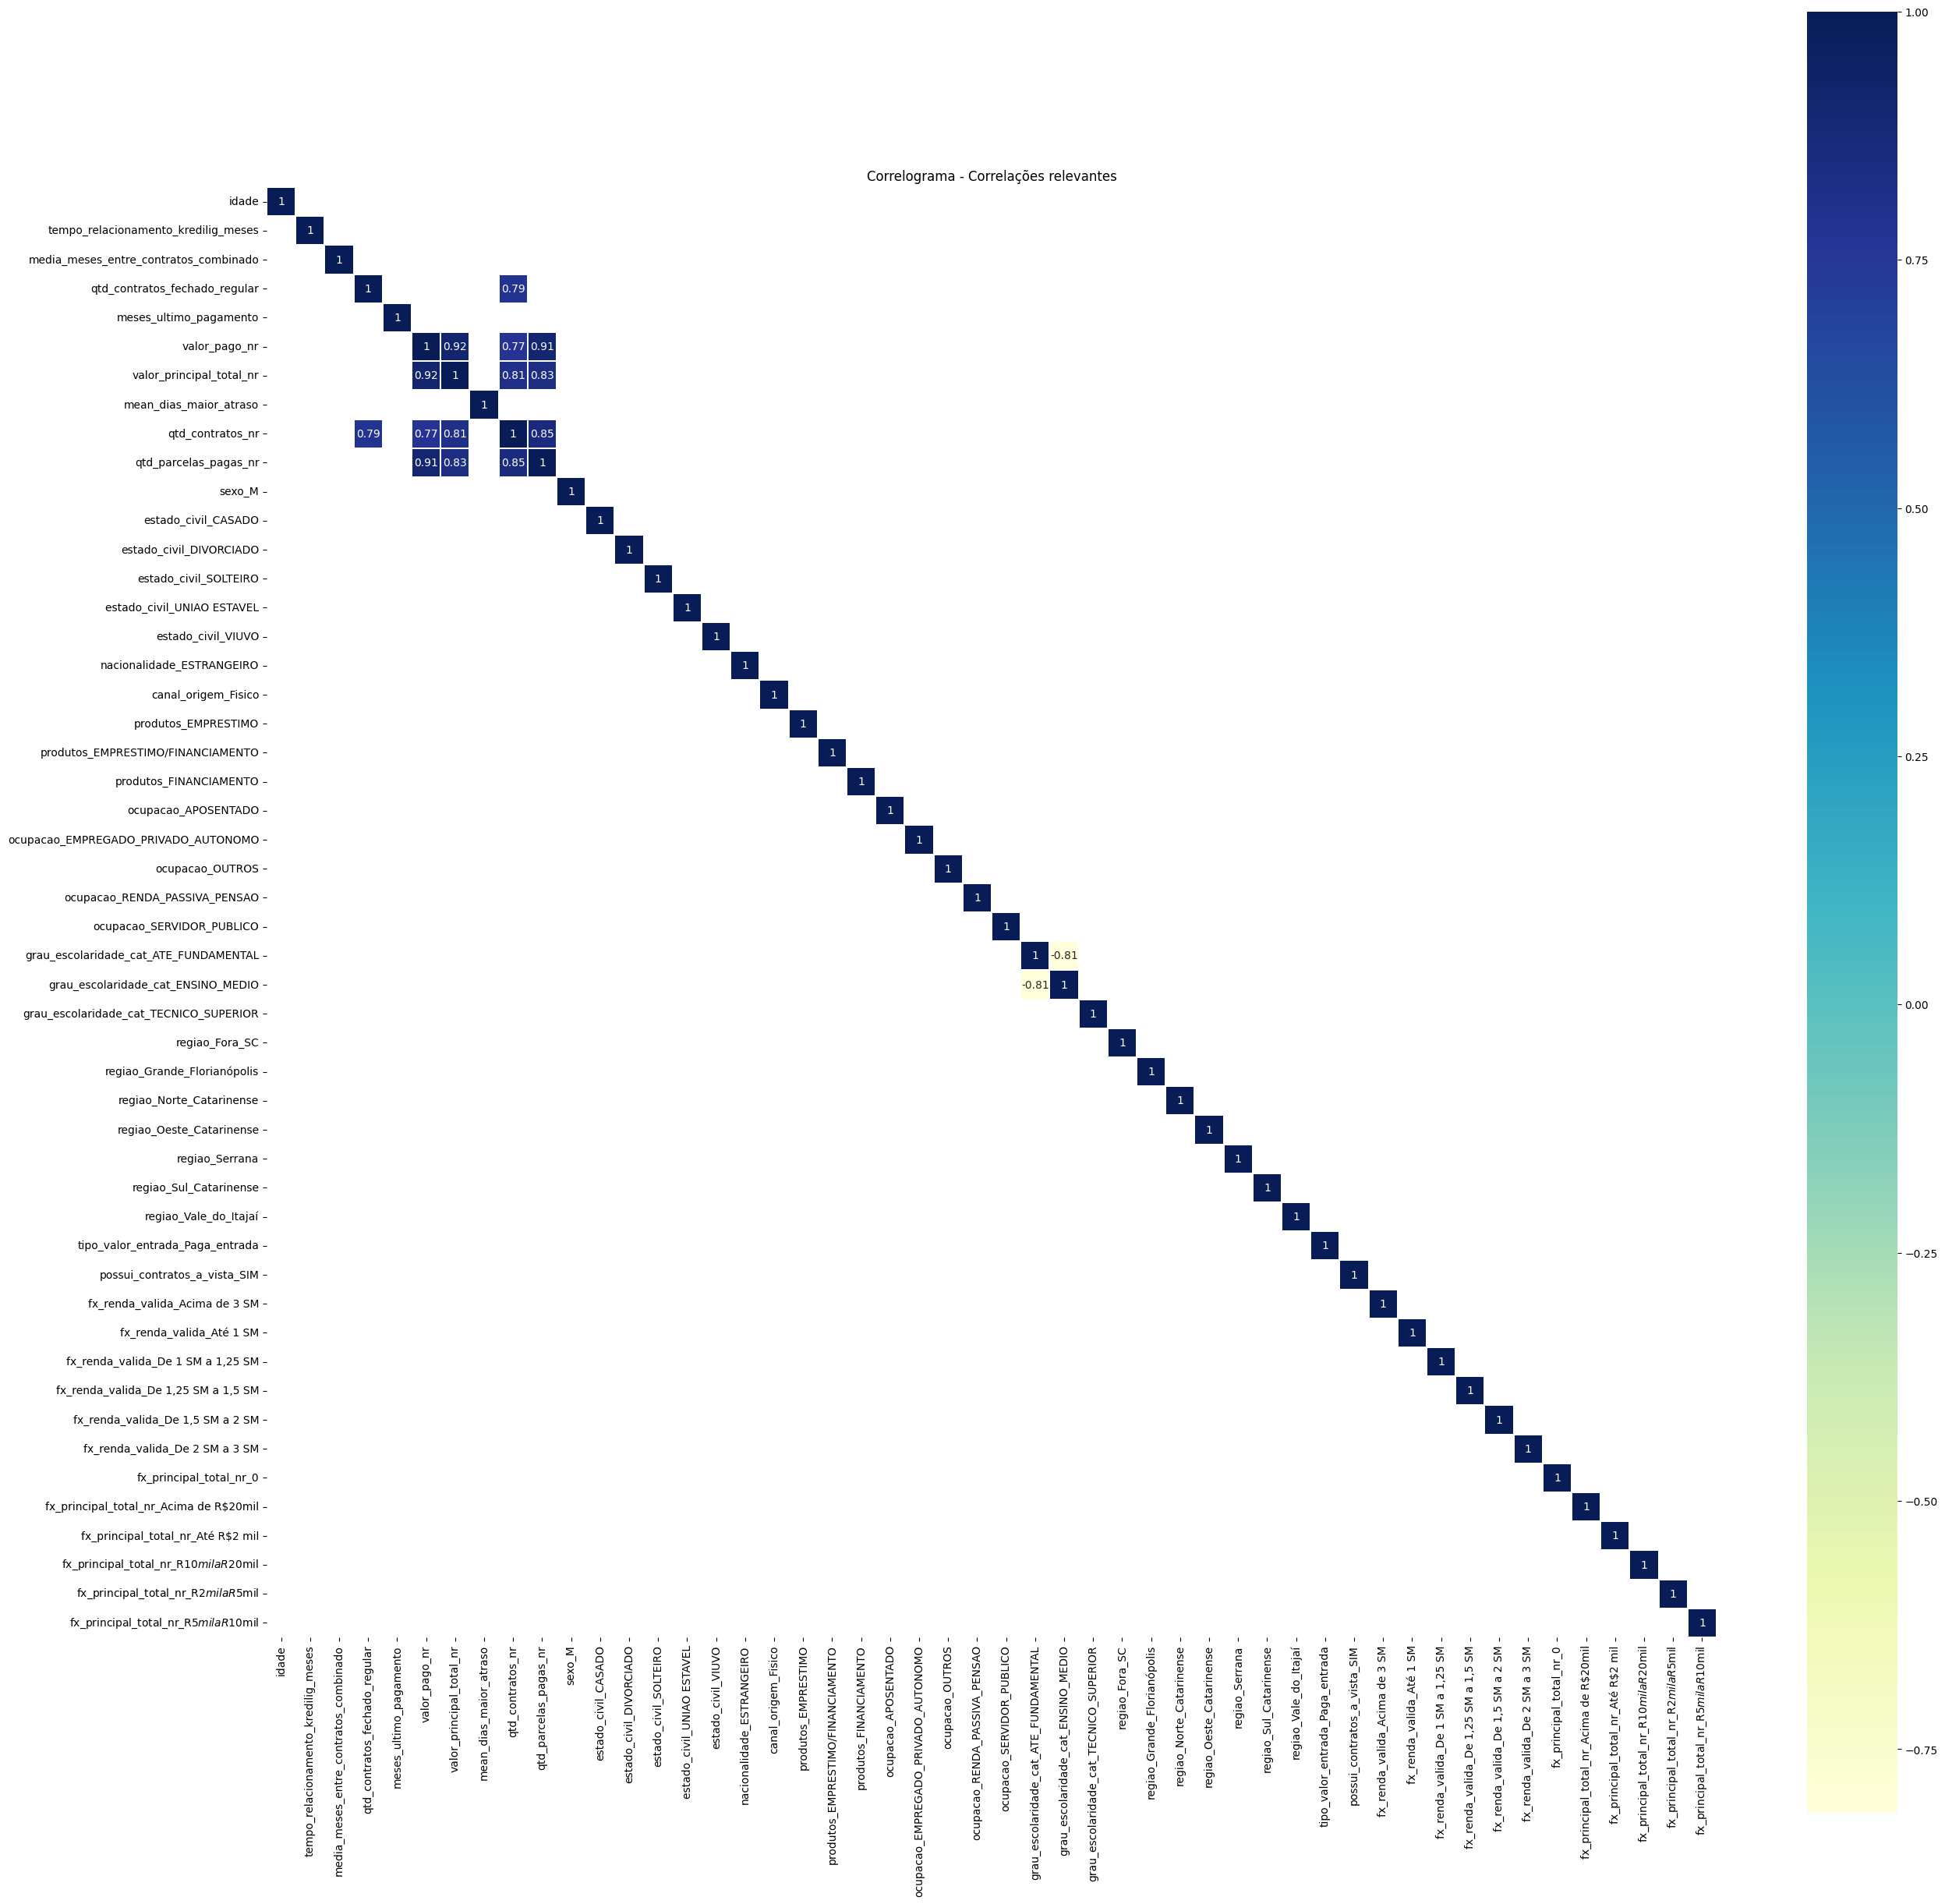

In [21]:
# Correlação
corr=X_train_d_select.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
w=h=30
plot.figure(figsize=(h,w))
sns.heatmap(corr,mask=mask,vmax=1.0,linewidths=0.01,
           square=True, annot=True,cmap='YlGnBu', linecolor='white')
plot.title('Correlograma')
plot.show

# Correlações relevantes
mask = np.abs(corr) >= 0.75
filtro_corr = corr.where(mask)

plot.figure(figsize=(h,w))
sns.heatmap(filtro_corr, vmax=1.0, linewidths=0.01,
            square=True, annot=True, cmap='YlGnBu', linecolor='white')
plot.title('Correlograma - Correlações relevantes')
plot.show()

In [22]:
# Assimetria
skewed_feats=X_train_d_select.apply(lambda x: skew(x.dropna()))
print(skewed_feats.sort_values(ascending=False))

nacionalidade_ESTRANGEIRO                  13.08
regiao_Fora_SC                             10.26
regiao_Oeste_Catarinense                    9.45
fx_renda_valida_Acima de 3 SM               7.08
ocupacao_OUTROS                             6.32
qtd_contratos_fechado_regular               6.32
regiao_Serrana                              5.59
fx_principal_total_nr_Acima de R$20mil      4.86
qtd_contratos_nr                            4.76
valor_principal_total_nr                    4.47
ocupacao_SERVIDOR_PUBLICO                   4.41
valor_pago_nr                               4.29
ocupacao_RENDA_PASSIVA_PENSAO               4.12
possui_contratos_a_vista_SIM                4.07
qtd_parcelas_pagas_nr                       3.92
grau_escolaridade_cat_TECNICO_SUPERIOR      3.67
estado_civil_VIUVO                          3.31
fx_renda_valida_De 2 SM a 3 SM              3.31
fx_principal_total_nr_0                     3.27
estado_civil_DIVORCIADO                     3.24
fx_renda_valida_Até 

In [23]:
# Variancia Nula
constant_features=[feat for feat in X_train_d_select.columns if X_train_d_select[feat].std()==0]
constant_features

[]

In [24]:
X_train_d_select.head(5)

,idade,tempo_relacionamento_kredilig_meses,media_meses_entre_contratos_combinado,qtd_contratos_fechado_regular,meses_ultimo_pagamento,valor_pago_nr,valor_principal_total_nr,mean_dias_maior_atraso,qtd_contratos_nr,qtd_parcelas_pagas_nr,sexo_M,estado_civil_CASADO,estado_civil_DIVORCIADO,estado_civil_SOLTEIRO,estado_civil_UNIAO ESTAVEL,estado_civil_VIUVO,nacionalidade_ESTRANGEIRO,canal_origem_Fisico,produtos_EMPRESTIMO,produtos_EMPRESTIMO/FINANCIAMENTO,produtos_FINANCIAMENTO,ocupacao_APOSENTADO,ocupacao_EMPREGADO_PRIVADO_AUTONOMO,ocupacao_OUTROS,ocupacao_RENDA_PASSIVA_PENSAO,ocupacao_SERVIDOR_PUBLICO,grau_escolaridade_cat_ATE_FUNDAMENTAL,grau_escolaridade_cat_ENSINO_MEDIO,grau_escolaridade_cat_TECNICO_SUPERIOR,regiao_Fora_SC,regiao_Grande_Florianópolis,regiao_Norte_Catarinense,regiao_Oeste_Catarinense,regiao_Serrana,regiao_Sul_Catarinense,regiao_Vale_do_Itajaí,tipo_valor_entrada_Paga_entrada,possui_contratos_a_vista_SIM,fx_renda_valida_Acima de 3 SM,fx_renda_valida_Até 1 SM,"fx_renda_valida_De 1 SM a 1,25 SM","fx_renda_valida_De 1,25 SM a 1,5 SM","fx_renda_valida_De 1,5 SM a 2 SM",fx_renda_valida_De 2 SM a 3 SM,fx_principal_total_nr_0,fx_principal_total_nr_Acima de R$20mil,fx_principal_total_nr_Até R$2 mil,fx_principal_total_nr_R$10 mil a R$20mil,fx_principal_total_nr_R$2 mil a R$5mil,fx_principal_total_nr_R$5 mil a R$10mil
0,50,91,0,0,23,0,0,2,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,59,19,0,1,9,999,901,6,1,10,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,71,99,1,3,21,15072,24422,1,11,70,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,47,105,0,1,33,492,330,0,1,6,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,41,78,2,16,0,26515,26735,11,19,194,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [25]:
X_train_d_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215311 entries, 0 to 215310
Data columns (total 50 columns):
 #   Column                                    Non-Null Count   Dtype
---  ------                                    --------------   -----
 0   idade                                     215311 non-null  int64
 1   tempo_relacionamento_kredilig_meses       215311 non-null  int64
 2   media_meses_entre_contratos_combinado     215311 non-null  int64
 3   qtd_contratos_fechado_regular             215311 non-null  int64
 4   meses_ultimo_pagamento                    215311 non-null  int64
 5   valor_pago_nr                             215311 non-null  int64
 6   valor_principal_total_nr                  215311 non-null  int64
 7   mean_dias_maior_atraso                    215311 non-null  int64
 8   qtd_contratos_nr                          215311 non-null  int64
 9   qtd_parcelas_pagas_nr                     215311 non-null  int64
 10  sexo_M                                    21

In [26]:
# Normalização
# Padronização dos dados de treino

num_cols = ['idade',
 'tempo_relacionamento_kredilig_meses',
 'media_meses_entre_contratos_combinado',
 'qtd_contratos_fechado_regular',
 'meses_ultimo_pagamento',
 #"qtd_parcelas_pagas",
 "qtd_parcelas_pagas_nr",
 #'meses_entre_primeiro_e_ultimo_pagamento',
 'valor_pago_nr',
 "valor_principal_total_nr",
 #'renda_valida_new',
 'mean_dias_maior_atraso',
 #'qtd_contratos',
 'qtd_contratos_nr',
 #"limite_total_ultimo_mes"
 ]

# Inicializa o scaler
scaler = StandardScaler()

# Ajusta e transforma os dados de treino
X_train_d_select[num_cols] = pd.DataFrame(
    scaler.fit_transform(X_train_d_select[num_cols]),
    columns=num_cols,
    index=X_train_d_select.index
)
## Valores da padronização são obtidos em relação ao dados de treino

In [27]:
## Salvando a normalizador como pickle
joblib.dump(scaler, 'scaler_num.pkl')

['scaler_num.pkl']

In [28]:
scaler.feature_names_in_

array(['idade', 'tempo_relacionamento_kredilig_meses',
       'media_meses_entre_contratos_combinado',
       'qtd_contratos_fechado_regular', 'meses_ultimo_pagamento',
       'qtd_parcelas_pagas_nr', 'valor_pago_nr',
       'valor_principal_total_nr', 'mean_dias_maior_atraso',
       'qtd_contratos_nr'], dtype=object)

In [29]:
X_train_d_select.head(5)

,idade,tempo_relacionamento_kredilig_meses,media_meses_entre_contratos_combinado,qtd_contratos_fechado_regular,meses_ultimo_pagamento,valor_pago_nr,valor_principal_total_nr,mean_dias_maior_atraso,qtd_contratos_nr,qtd_parcelas_pagas_nr,sexo_M,estado_civil_CASADO,estado_civil_DIVORCIADO,estado_civil_SOLTEIRO,estado_civil_UNIAO ESTAVEL,estado_civil_VIUVO,nacionalidade_ESTRANGEIRO,canal_origem_Fisico,produtos_EMPRESTIMO,produtos_EMPRESTIMO/FINANCIAMENTO,produtos_FINANCIAMENTO,ocupacao_APOSENTADO,ocupacao_EMPREGADO_PRIVADO_AUTONOMO,ocupacao_OUTROS,ocupacao_RENDA_PASSIVA_PENSAO,ocupacao_SERVIDOR_PUBLICO,grau_escolaridade_cat_ATE_FUNDAMENTAL,grau_escolaridade_cat_ENSINO_MEDIO,grau_escolaridade_cat_TECNICO_SUPERIOR,regiao_Fora_SC,regiao_Grande_Florianópolis,regiao_Norte_Catarinense,regiao_Oeste_Catarinense,regiao_Serrana,regiao_Sul_Catarinense,regiao_Vale_do_Itajaí,tipo_valor_entrada_Paga_entrada,possui_contratos_a_vista_SIM,fx_renda_valida_Acima de 3 SM,fx_renda_valida_Até 1 SM,"fx_renda_valida_De 1 SM a 1,25 SM","fx_renda_valida_De 1,25 SM a 1,5 SM","fx_renda_valida_De 1,5 SM a 2 SM",fx_renda_valida_De 2 SM a 3 SM,fx_principal_total_nr_0,fx_principal_total_nr_Acima de R$20mil,fx_principal_total_nr_Até R$2 mil,fx_principal_total_nr_R$10 mil a R$20mil,fx_principal_total_nr_R$2 mil a R$5mil,fx_principal_total_nr_R$5 mil a R$10mil
0,-0.07,1.22,-0.75,-0.64,1.24,-0.77,-0.83,-0.56,-0.84,-0.77,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,0.50,-1.15,-0.75,-0.36,-0.02,-0.64,-0.70,-0.16,-0.61,-0.55,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,1.25,1.48,-0.56,0.22,1.06,1.16,2.74,-0.66,1.62,0.83,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,-0.26,1.68,-0.75,-0.36,2.14,-0.70,-0.78,-0.76,-0.61,-0.64,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,-0.64,0.79,-0.37,3.95,-0.84,2.62,3.08,0.34,3.42,3.67,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


<Axes: >

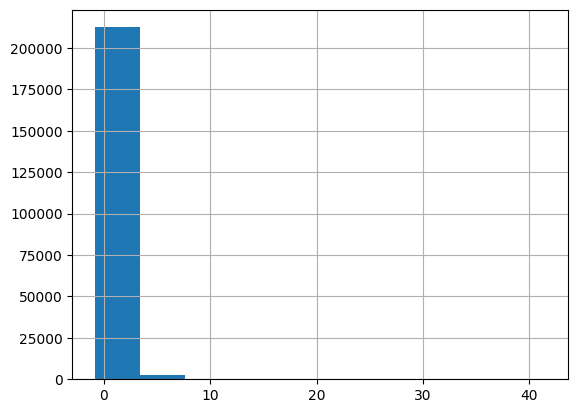

In [30]:
X_train_d_select.valor_principal_total_nr.hist()

<Axes: >

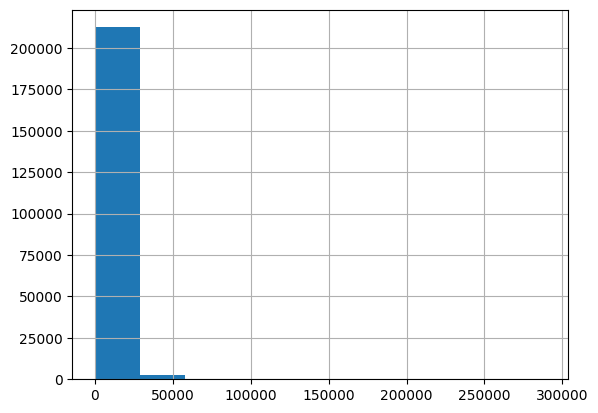

In [31]:
X_train_dummy.valor_principal_total_nr.hist()

In [32]:
'''# LASSO
# Hiperparêmetros
param_grid = {'alpha': [0.0001,0.001]}
cv = KFold(n_splits=5, shuffle=True, random_state=42)
lasso = Lasso(max_iter=10000)

grid = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=cv)
grid.fit(X_train_d_select, y_train)

# Melhor modelo
melhor_modelo_lasso = grid.best_estimator_
grid.best_estimator_
'''

"# LASSO\n# Hiperparêmetros\nparam_grid = {'alpha': [0.0001,0.001]}\ncv = KFold(n_splits=5, shuffle=True, random_state=42)\nlasso = Lasso(max_iter=10000)\n\ngrid = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=cv)\ngrid.fit(X_train_d_select, y_train)\n\n# Melhor modelo\nmelhor_modelo_lasso = grid.best_estimator_\ngrid.best_estimator_\n"

In [33]:
'''lasso_coef = pd.Series(melhor_modelo_lasso.coef_, index=X_train_d_select.columns)
importancia = lasso_coef.abs().sort_values(ascending=False)
print("Importância das variáveis no treino:")
print(importancia)
importancia.head(68).plot(kind='barh', figsize=(10, 20), title="Importancia das variáveis no modelo LASSO")'''


'lasso_coef = pd.Series(melhor_modelo_lasso.coef_, index=X_train_d_select.columns)\nimportancia = lasso_coef.abs().sort_values(ascending=False)\nprint("Importância das variáveis no treino:")\nprint(importancia)\nimportancia.head(68).plot(kind=\'barh\', figsize=(10, 20), title="Importancia das variáveis no modelo LASSO")'

In [34]:
''''# Balanceamento dos dados

# Superamostragem da minoria
over = SVMSMOTE(sampling_strategy=0.5, random_state=2025)
X_over, y_over = over.fit_resample(X_train_d_select, y_train)

# Subamostragem da maioria
under = RandomUnderSampler(sampling_strategy=0.6, random_state=2025)
X_final, y_final = under.fit_resample(X_over, y_over)'''

"'# Balanceamento dos dados\n\n# Superamostragem da minoria\nover = SVMSMOTE(sampling_strategy=0.5, random_state=2025)\nX_over, y_over = over.fit_resample(X_train_d_select, y_train)\n\n# Subamostragem da maioria\nunder = RandomUnderSampler(sampling_strategy=0.6, random_state=2025)\nX_final, y_final = under.fit_resample(X_over, y_over)"

In [35]:
'''# Verificando a distribuição das classes após o balanceamento
print("Antes do balanceamento:", y_train.value_counts())
print("Após Superamostragem:", y_over.value_counts())
print("Após Subamostragem:", y_final.value_counts())'''
X_final, y_final=X_train_d_select, y_train

In [36]:
X_final.columns.to_list()

['idade',
 'tempo_relacionamento_kredilig_meses',
 'media_meses_entre_contratos_combinado',
 'qtd_contratos_fechado_regular',
 'meses_ultimo_pagamento',
 'valor_pago_nr',
 'valor_principal_total_nr',
 'mean_dias_maior_atraso',
 'qtd_contratos_nr',
 'qtd_parcelas_pagas_nr',
 'sexo_M',
 'estado_civil_CASADO',
 'estado_civil_DIVORCIADO',
 'estado_civil_SOLTEIRO',
 'estado_civil_UNIAO ESTAVEL',
 'estado_civil_VIUVO',
 'nacionalidade_ESTRANGEIRO',
 'canal_origem_Fisico',
 'produtos_EMPRESTIMO',
 'produtos_EMPRESTIMO/FINANCIAMENTO',
 'produtos_FINANCIAMENTO',
 'ocupacao_APOSENTADO',
 'ocupacao_EMPREGADO_PRIVADO_AUTONOMO',
 'ocupacao_OUTROS',
 'ocupacao_RENDA_PASSIVA_PENSAO',
 'ocupacao_SERVIDOR_PUBLICO',
 'grau_escolaridade_cat_ATE_FUNDAMENTAL',
 'grau_escolaridade_cat_ENSINO_MEDIO',
 'grau_escolaridade_cat_TECNICO_SUPERIOR',
 'regiao_Fora_SC',
 'regiao_Grande_Florianópolis',
 'regiao_Norte_Catarinense',
 'regiao_Oeste_Catarinense',
 'regiao_Serrana',
 'regiao_Sul_Catarinense',
 'regiao_Vale

### Base de teste - Pré processamento

In [37]:
df_test=pd.read_csv("C:/Users/fernando.monteiro/deep-torch-example/KAB/Behavior_KAB/Desenvolvimento/Cluster/df_test.csv", sep=",", header=0, index_col=None)
X_test=df_test.copy()

In [38]:
# Amostragem
#Variável de interesse
y_test = X_test >> select(X.inad_e_reneg)

# Remover a variável resposta do conjunto de dados
X_test.drop(['inad_e_reneg'],axis=1, inplace=True)
# Frequência da variável target no treino
print(y_test.value_counts()) #qtd treino

inad_e_reneg
0               64688
1               27589
Name: count, dtype: int64


In [39]:
ids_test = X_test["cpf_cnpj"]  
X_test = X_test.drop(columns=["cpf_cnpj"])

In [40]:
# one hot encoding 
X_test_dummy = pd.get_dummies(X_test).astype(int)
X_test_dummy = X_test_dummy.reindex(columns=X_train_dummy.columns, fill_value=0)

In [41]:
# Seleção de variáveis
X_test_d_select = X_test_dummy.reindex(columns=X_train_d_select.columns, fill_value=0)

In [42]:
## conjunto de teste - precisa ser o modelo que treinado para evitar vazamento de informação
X_test_d_select[num_cols] = pd.DataFrame(
    scaler.transform(X_test_d_select[num_cols]),
    columns=num_cols,
    index=X_test_d_select.index
)

# Modelos de Machine Learning

#### XGBoost

In [ ]:
#modelo

# Criando um modelo XGBoost
xgb_model = XGBClassifier(
    objective="binary:logistic",  # binária
    eval_metric="logloss",        # métrica de erro logístico — comum em classificação
    use_label_encoder=False,      # desativar aviso de codificação depreciada
    random_state=2025             # Semente
    )

# GridSearch
parameters = {
    'learning_rate': [0.05, 0.1, 0.2],  # Controla o quanto cada árvore contribui para o modelo final. Taxas menores tornam o aprendizado mais lento, mas potencialmente mais preciso
    'max_depth': [2,3,4,5,6,7,8,9,10],  # Define o quão profunda cada árvore de decisão pode ser. Controla a complexidade do modelo
    'min_child_weight': [1, 2, 3],      # Determina o mínimo de "peso" (número de amostras ponderadas) necessário para que uma divisão ocorra em uma árvore
    'subsample': [0.6, 0.8, 1.0],       # Porcentagem das amostras usadas para treinar cada árvore
    'colsample_bytree': [0.6, 0.8, 1.0],# Porcentagem das colunas (variáveis) usadas ao construir cada árvore.
    'n_estimators': [100, 200]          # Número de árvores.
}

xgb_grid = GridSearchCV(
    xgb_model,
    parameters,
    scoring='roc_auc',  # métrica comum para classificação binária
    cv=5,               # Significado: Usa validação cruzada com 5 folds (partições)
    n_jobs=5,           # Define o número de processos paralelos usados durante a busca
    verbose=1,           # Mostra o progresso da busca no terminal.
)

# RandomizedSearchCV
param_dists = {
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [2,3,4,5,6,7,8,9,10],  
    'min_child_weight': [1,2,3,4,5,10,15,20],   
    "gamma": [0.5,1,2,3,4,5],
    'subsample': [0.6, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.8, 0.9],
    'n_estimators': [100, 200, 300],    
}

xgb_rand = RandomizedSearchCV(
    xgb_model,
    param_dists,
    scoring='roc_auc',  # métrica comum para classificação binária
    cv=5,               # Significado: Usa validação cruzada com 5 folds (partições)
    n_jobs=5,           # Define o número de processos paralelos usados durante a busca
    verbose=1,           # Mostra o progresso da busca no terminal.
    random_state=2025   
)

In [43]:
'''X_final_xgb=X_final[['idade',
 'media_meses_entre_contratos_combinado',
 'meses_ultimo_pagamento',
 #'meses_entre_primeiro_e_ultimo_pagamento',
 'valor_pago_nr', # Voltar e analisar
 #'renda_valida_new',
 'mean_dias_maior_atraso',
 'qtd_contratos',
 'sexo_M',
 #'estado_civil_DIVORCIADO',
 'estado_civil_SOLTEIRO',
 #'estado_civil_UNIAO ESTAVEL',
 #'estado_civil_VIUVO',
 'canal_origem_Fisico', # Voltar e analisar
 #'ocupacao_EMPREGADO_PRIVADO_AUTONOMO',
 #'ocupacao_OUTROS',
 'ocupacao_RENDA_PASSIVA_PENSAO',
 'ocupacao_SERVIDOR_PUBLICO',
 'grau_escolaridade_cat_ENSINO_MEDIO',
 'grau_escolaridade_cat_TECNICO_SUPERIOR',
 'regiao_Grande_Florianópolis',
 'regiao_Norte_Catarinense',
 #'regiao_Oeste_Catarinense',
 'regiao_Serrana',
 'regiao_Sul_Catarinense',
 #'regiao_Vale_do_Itajaí',
 'possui_contratos_a_vista_SIM',
 'tipo_valor_entrada_Paga_entrada',
 'fx_renda_valida_Até 1 SM',
# 'fx_renda_valida_De 1 SM a 1,25 SM',
 'fx_renda_valida_De 1,25 SM a 1,5 SM',
 'fx_renda_valida_De 1,5 SM a 2 SM',
 'fx_renda_valida_De 2 SM a 3 SM',
 # 'fx_ult_limite_Até R$1 mil',
 #'fx_ult_limite_R$1 mil a R$2,5 mil',
 #'fx_ult_limite_R$10 mil a R$15mil',
 'fx_ult_limite_R$15 mil a R$20mil',
 'fx_ult_limite_R$2,5 mil a R$5 mil',
 #'fx_ult_limite_R$5 mil a R$7,5 mil',
 #'fx_ult_limite_R$7,5 mil a R$10mil',
 'fx_principal_total_nr_Acima de R$20mil',
 'fx_principal_total_nr_Até R$2 mil',
 'fx_principal_total_nr_R$10 mil a R$20mil',
 'fx_principal_total_nr_R$2 mil a R$5mil',
 'fx_principal_total_nr_R$5 mil a R$10mil',
 ]]'''

X_final_xgb=X_final[['idade',
 'tempo_relacionamento_kredilig_meses',
 'media_meses_entre_contratos_combinado',
 'meses_ultimo_pagamento',
 'valor_pago_nr',
 'mean_dias_maior_atraso',
 'qtd_contratos_nr',
 'sexo_M',
 'estado_civil_DIVORCIADO',
 'estado_civil_SOLTEIRO',
 'estado_civil_UNIAO ESTAVEL',
 'estado_civil_VIUVO',
 'canal_origem_Fisico',
 'produtos_FINANCIAMENTO',
 'ocupacao_EMPREGADO_PRIVADO_AUTONOMO',
 'ocupacao_OUTROS',
 'ocupacao_RENDA_PASSIVA_PENSAO',
 'ocupacao_SERVIDOR_PUBLICO',
 'grau_escolaridade_cat_ENSINO_MEDIO',
 'grau_escolaridade_cat_TECNICO_SUPERIOR',
 'regiao_Grande_Florianópolis',
 'regiao_Norte_Catarinense',
 'regiao_Oeste_Catarinense',
 'regiao_Serrana',
 'regiao_Sul_Catarinense',
 'regiao_Vale_do_Itajaí',
 'tipo_valor_entrada_Paga_entrada',
 'possui_contratos_a_vista_SIM',
 'fx_renda_valida_Até 1 SM',
 'fx_renda_valida_De 1 SM a 1,25 SM',
 'fx_renda_valida_De 1,25 SM a 1,5 SM',
 'fx_renda_valida_De 1,5 SM a 2 SM',
 'fx_renda_valida_De 2 SM a 3 SM',
 'fx_principal_total_nr_Acima de R$20mil',
 'fx_principal_total_nr_Até R$2 mil',
 'fx_principal_total_nr_R$10 mil a R$20mil',
 'fx_principal_total_nr_R$2 mil a R$5mil',
 'fx_principal_total_nr_R$5 mil a R$10mil']]

In [ ]:
#xgb_grid.fit(X_final, y_final)

In [ ]:
#xgb_rand.fit(X_final_xgb, y_final)

In [ ]:
#xgb = xgb_grid.best_estimator_
#xgb = xgb_rand.best_estimator_
#xgb

In [ ]:
#########################
# Bayesian Optimization #
#########################
# 1. Função objetivo
def xgb_cv(learning_rate, max_depth, min_child_weight, gamma,
           subsample, colsample_bytree, n_estimators,reg_alpha,reg_lambda):

    # modelo base
    model = XGBClassifier(
        learning_rate=learning_rate,
        max_depth=int(max_depth),  # precisa ser int
        min_child_weight=int(min_child_weight),
        gamma=gamma,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        n_estimators=int(n_estimators),
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        objective="binary:logistic",
        n_jobs=5,
        random_state=2025,
        eval_metric="auc"
    )
    
    # validação cruzada
    auc = cross_val_score(model, X_final_xgb, y_final,
                          scoring="roc_auc", cv=5).mean()
    return auc

# 2. Espaço de busca
pbounds = {
    'learning_rate': (0.05, 0.2),
    'max_depth': (2,5),
    'min_child_weight': (1,20),
    "gamma": (0.5,5),
    'subsample': (0.6, 0.9),
    'colsample_bytree': (0.6, 0.9),
    'n_estimators': (100,300),
    "reg_alpha": (0,10),
    "reg_lambda": (0,20)
}

# 3. Rodando o Bayesian Optimization
optimizer = BayesianOptimization(
    f=xgb_cv,
    pbounds=pbounds,
    random_state=2025,
    verbose=2
)

optimizer.maximize(init_points=5, n_iter=15)


|   iter    |  target   | learni... | max_depth | min_ch... |   gamma   | subsample | colsam... | n_esti... | reg_alpha | reg_la... |
-------------------------------------------------------------------------------------------------------------------------------------
| 1         | 0.9111958 | 0.0703232 | 4.6635551 | 18.719507 | 2.5050567 | 0.7164706 | 0.6772789 | 231.47351 | 4.9261693 | 19.284768 |
| 2         | 0.9076013 | 0.1701476 | 3.3656158 | 16.220103 | 0.6877308 | 0.8308373 | 0.6009513 | 158.56187 | 6.1091433 | 18.260547 |
| 3         | 0.8957648 | 0.0950172 | 2.7457959 | 13.661449 | 4.9438980 | 0.7404811 | 0.6369862 | 283.20627 | 9.4614353 | 5.5539474 |
| 4         | 0.8992853 | 0.1279480 | 2.4642349 | 1.2779197 | 1.9590944 | 0.8972695 | 0.7539423 | 275.29912 | 0.6739574 | 5.6830747 |
| 5         | 0.9158127 | 0.1203348 | 4.2853195 | 18.529623 | 2.2686069 | 0.8787263 | 0.7498836 | 260.40993 | 8.9658011 | 9.6425815 |
| 6         | 0.9157263 | 0.1121944 | 4.0772484 | 18.927447 | 

In [ ]:
best_params = optimizer.max['params']
best_params['max_depth'] = int(best_params['max_depth'])
best_params['min_child_weight'] = int(best_params['min_child_weight'])
best_params['n_estimators'] = int(best_params['n_estimators'])
xgb = XGBClassifier(
    objective="binary:logistic",
    n_jobs=5,
    random_state=2025,
    eval_metric="auc",
    **best_params
)
xgb.fit(X_final_xgb, y_final)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=np.float64(0.9), device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', feature_types=None, feature_weights=None,
              gamma=np.float64(0.5), grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=np.float64(0.2),
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=251, n_jobs=5,
              num_parallel_tree=None, ...)

In [ ]:
joblib.dump(xgb, "xgb_7.pkl")

['xgb_7.pkl']

In [ ]:
# quais as caracteristicas mais importantes para definir a inadimplência?
importancias = xgb.feature_importances_
nomes_variaveis = X_final_xgb.columns

df_importancia = pd.DataFrame({
    'Variável': nomes_variaveis,
    'Importância': importancias
})

# Ordenar por importância
df_importancia = df_importancia.sort_values(by='Importância', ascending=False)
print(df_importancia)

                                    Variável  Importância
13                    produtos_FINANCIAMENTO         0.29
3                     meses_ultimo_pagamento         0.07
5                     mean_dias_maior_atraso         0.07
4                              valor_pago_nr         0.06
36    fx_principal_total_nr_R$2 mil a R$5mil         0.06
6                           qtd_contratos_nr         0.05
34         fx_principal_total_nr_Até R$2 mil         0.05
2      media_meses_entre_contratos_combinado         0.05
33    fx_principal_total_nr_Acima de R$20mil         0.04
12                       canal_origem_Fisico         0.02
37   fx_principal_total_nr_R$5 mil a R$10mil         0.02
1        tempo_relacionamento_kredilig_meses         0.02
0                                      idade         0.02
26           tipo_valor_entrada_Paga_entrada         0.02
35  fx_principal_total_nr_R$10 mil a R$20mil         0.02
27              possui_contratos_a_vista_SIM         0.02
19    grau_esc

#### Regressão Logística

In [ ]:
logistico_model = LogisticRegression(class_weight ='balanced',
                                     penalty="l1",      # Lasso
                                     solver="liblinear",# necessário para L1
                                     max_iter=5000,
                                     random_state=2025) 
# Tentar com LASSO
# Valida cruzada estratificada com 10 folds e 3 repetições
cv = RepeatedStratifiedKFold(n_splits=10, # Os dados serão divididos em n partes (folds)
                             n_repeats=10, # O processo será repetido n vezes, cada vez com uma divisão diferente
                             random_state=2025
                             )

# Grid para o LASSO
param_grid = {
    "C": [0.001, 0.01] 
}

# GridSearch
logistico_model_grid = GridSearchCV(
    estimator=logistico_model,
    param_grid=param_grid,
    scoring="roc_auc",  # métrica de avaliação
    cv=cv,
    n_jobs=-1
)

In [44]:
'''# step back com regiao
X_final_rl=X_final[['idade',
 'media_meses_entre_contratos_combinado',
 'meses_ultimo_pagamento',
 #'meses_entre_primeiro_e_ultimo_pagamento',
 'valor_pago_nr', # Voltar e analisar
 #'renda_valida_new',
 'mean_dias_maior_atraso',
 'qtd_contratos',
 'sexo_M',
 #'estado_civil_DIVORCIADO',
 'estado_civil_SOLTEIRO',
 #'estado_civil_UNIAO ESTAVEL',
 #'estado_civil_VIUVO',
 'canal_origem_Fisico', # Voltar e analisar
 #'ocupacao_EMPREGADO_PRIVADO_AUTONOMO',
 #'ocupacao_OUTROS',
 'ocupacao_RENDA_PASSIVA_PENSAO',
 'ocupacao_SERVIDOR_PUBLICO',
 'grau_escolaridade_cat_ENSINO_MEDIO',
 'grau_escolaridade_cat_TECNICO_SUPERIOR',
 'regiao_Grande_Florianópolis',
 'regiao_Norte_Catarinense',
 #'regiao_Oeste_Catarinense',
 'regiao_Serrana',
 'regiao_Sul_Catarinense',
 #'regiao_Vale_do_Itajaí',
 'possui_contratos_a_vista_SIM',
 'tipo_valor_entrada_Paga_entrada',
 'fx_renda_valida_Até 1 SM',
# 'fx_renda_valida_De 1 SM a 1,25 SM',
 'fx_renda_valida_De 1,25 SM a 1,5 SM',
 'fx_renda_valida_De 1,5 SM a 2 SM',
 'fx_renda_valida_De 2 SM a 3 SM',
 # 'fx_ult_limite_Até R$1 mil',
 #'fx_ult_limite_R$1 mil a R$2,5 mil',
 #'fx_ult_limite_R$10 mil a R$15mil',
 'fx_ult_limite_R$15 mil a R$20mil',
 'fx_ult_limite_R$2,5 mil a R$5 mil',
 #'fx_ult_limite_R$5 mil a R$7,5 mil',
 #'fx_ult_limite_R$7,5 mil a R$10mil',
 'fx_principal_total_nr_Acima de R$20mil',
 'fx_principal_total_nr_Até R$2 mil',
 'fx_principal_total_nr_R$10 mil a R$20mil',
 'fx_principal_total_nr_R$2 mil a R$5mil',
 'fx_principal_total_nr_R$5 mil a R$10mil',
 ]]

# step back com regiao
selected_features=['idade', 'media_meses_entre_contratos_combinado', 'meses_ultimo_pagamento', 'valor_pago_nr', 'mean_dias_maior_atraso', 'qtd_contratos', 'sexo_M', 'canal_origem_Fisico', 'possui_contratos_a_vista_SIM', 'tipo_valor_entrada_Paga_entrada', 'fx_principal_total_nr_Acima de R$20mil', 'fx_principal_total_nr_Até R$2 mil', 'fx_principal_total_nr_R$10 mil a R$20mil', 'fx_principal_total_nr_R$2 mil a R$5mil', 'fx_principal_total_nr_R$5 mil a R$10mil']
X_train_selected = X_final_rl[selected_features]'''

X_final_rl=X_final[['idade',
 'tempo_relacionamento_kredilig_meses',
 'media_meses_entre_contratos_combinado',
 'meses_ultimo_pagamento',
 'valor_pago_nr',
 'mean_dias_maior_atraso',
 'qtd_contratos_nr',
 'sexo_M',
 'estado_civil_DIVORCIADO',
 'estado_civil_SOLTEIRO',
 'estado_civil_UNIAO ESTAVEL',
 'estado_civil_VIUVO',
 'canal_origem_Fisico',
 'produtos_FINANCIAMENTO',
 'ocupacao_EMPREGADO_PRIVADO_AUTONOMO',
 'ocupacao_OUTROS',
 'ocupacao_RENDA_PASSIVA_PENSAO',
 'ocupacao_SERVIDOR_PUBLICO',
 'grau_escolaridade_cat_ENSINO_MEDIO',
 'grau_escolaridade_cat_TECNICO_SUPERIOR',
 'regiao_Grande_Florianópolis',
 'regiao_Norte_Catarinense',
 'regiao_Oeste_Catarinense',
 'regiao_Serrana',
 'regiao_Sul_Catarinense',
 'regiao_Vale_do_Itajaí',
 'tipo_valor_entrada_Paga_entrada',
 'possui_contratos_a_vista_SIM',
 'fx_renda_valida_Até 1 SM',
 'fx_renda_valida_De 1 SM a 1,25 SM',
 'fx_renda_valida_De 1,25 SM a 1,5 SM',
 'fx_renda_valida_De 1,5 SM a 2 SM',
 'fx_renda_valida_De 2 SM a 3 SM',
 'fx_principal_total_nr_Acima de R$20mil',
 'fx_principal_total_nr_Até R$2 mil',
 'fx_principal_total_nr_R$10 mil a R$20mil',
 'fx_principal_total_nr_R$2 mil a R$5mil',
 'fx_principal_total_nr_R$5 mil a R$10mil']]

selected_features=['idade', 'tempo_relacionamento_kredilig_meses', 'media_meses_entre_contratos_combinado', 'meses_ultimo_pagamento', 'mean_dias_maior_atraso', 'sexo_M', 'estado_civil_DIVORCIADO', 'estado_civil_SOLTEIRO', 'estado_civil_UNIAO ESTAVEL', 'estado_civil_VIUVO', 'canal_origem_Fisico', 'produtos_FINANCIAMENTO', 'grau_escolaridade_cat_ENSINO_MEDIO', 'grau_escolaridade_cat_TECNICO_SUPERIOR', 'tipo_valor_entrada_Paga_entrada', 'fx_renda_valida_Até 1 SM', 'fx_renda_valida_De 2 SM a 3 SM', 'fx_principal_total_nr_Até R$2 mil', 'fx_principal_total_nr_R$5 mil a R$10mil']
X_train_selected = X_final_rl[selected_features]

In [ ]:
#logistico_model_grid.fit(X_final_rl, y_final)
#logistico_model = logistico_model_grid.best_estimator_

In [ ]:
#logistico_model

In [ ]:
# StepWise

log_reg = LogisticRegression(max_iter=1000,class_weight ='balanced', solver='liblinear')


# stepwise forward selection
sfs = SequentialFeatureSelector(
    log_reg,
    n_features_to_select="auto",   # ou um número fixo
    direction="forward",           
    scoring="roc_auc",
    cv=5,
    n_jobs=-1
)

sfs.fit(X_final_rl, y_final)

SequentialFeatureSelector(estimator=LogisticRegression(class_weight='balanced',
                                                       max_iter=1000,
                                                       solver='liblinear'),
                          n_jobs=-1, scoring='roc_auc')

In [ ]:
# variáveis escolhidas
selected_features = X_final_rl.columns[sfs.get_support()]
print("Variáveis selecionadas:", list(selected_features))

Variáveis selecionadas: ['idade', 'tempo_relacionamento_kredilig_meses', 'media_meses_entre_contratos_combinado', 'meses_ultimo_pagamento', 'mean_dias_maior_atraso', 'sexo_M', 'estado_civil_DIVORCIADO', 'estado_civil_SOLTEIRO', 'estado_civil_UNIAO ESTAVEL', 'estado_civil_VIUVO', 'canal_origem_Fisico', 'produtos_FINANCIAMENTO', 'grau_escolaridade_cat_ENSINO_MEDIO', 'grau_escolaridade_cat_TECNICO_SUPERIOR', 'tipo_valor_entrada_Paga_entrada', 'fx_renda_valida_Até 1 SM', 'fx_renda_valida_De 2 SM a 3 SM', 'fx_principal_total_nr_Até R$2 mil', 'fx_principal_total_nr_R$5 mil a R$10mil']


In [ ]:
# reduzindo X_train e X_test
X_train_selected = X_final_rl[selected_features]

# ajusta o modelo final
logistico_model.fit(X_train_selected, y_final)

c:\Users\fernando.monteiro\deep-torch-example\KAB\Behavior_KAB\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced', max_iter=5000, penalty='l1',
                   random_state=2025, solver='liblinear')

In [ ]:
joblib.dump(logistico_model, "log_7.pkl")

['log_7.pkl']

In [ ]:
# Qual o efeito das caracteristicas sobre a inadimplência?
coef_df = pd.DataFrame({
    'Variável': X_train_selected.columns,
    'Coeficiente': logistico_model.coef_[0],
    'Odds Ratio': np.exp(logistico_model.coef_[0])
}).sort_values(by='Coeficiente', ascending=False)
print(coef_df)

                                   Variável  Coeficiente  Odds Ratio
3                    meses_ultimo_pagamento         0.73        2.07
4                    mean_dias_maior_atraso         0.60        1.82
9                        estado_civil_VIUVO         0.27        1.31
6                   estado_civil_DIVORCIADO         0.20        1.22
7                     estado_civil_SOLTEIRO         0.19        1.21
8                estado_civil_UNIAO ESTAVEL         0.18        1.20
18  fx_principal_total_nr_R$5 mil a R$10mil         0.17        1.19
5                                    sexo_M         0.12        1.13
15                 fx_renda_valida_Até 1 SM         0.10        1.11
12       grau_escolaridade_cat_ENSINO_MEDIO        -0.14        0.87
14          tipo_valor_entrada_Paga_entrada        -0.16        0.85
16           fx_renda_valida_De 2 SM a 3 SM        -0.20        0.82
1       tempo_relacionamento_kredilig_meses        -0.20        0.82
17        fx_principal_total_nr_At

In [ ]:
'''X_final_2=X_final[['idade',
 'media_meses_entre_contratos_combinado',
 'meses_ultimo_pagamento',
 #'meses_entre_primeiro_e_ultimo_pagamento',
 #'valor_pago_nr', # Voltar e analisar
 #'renda_valida_new',
 'mean_dias_maior_atraso',
 'qtd_contratos',
 'sexo_M',
 #'estado_civil_DIVORCIADO',
 'estado_civil_SOLTEIRO',
 #'estado_civil_UNIAO ESTAVEL',
 #'estado_civil_VIUVO',
# 'canal_origem_Fisico', # Voltar e analisar
 #'ocupacao_EMPREGADO_PRIVADO_AUTONOMO',
 #'ocupacao_OUTROS',
 'ocupacao_RENDA_PASSIVA_PENSAO',
 'ocupacao_SERVIDOR_PUBLICO',
 'grau_escolaridade_cat_ENSINO_MEDIO',
 'grau_escolaridade_cat_TECNICO_SUPERIOR',
 'regiao_Grande_Florianópolis',
 'regiao_Norte_Catarinense',
 #'regiao_Oeste_Catarinense',
 'regiao_Serrana',
 'regiao_Sul_Catarinense',
 #'regiao_Vale_do_Itajaí',
 'possui_contratos_a_vista_SIM',
 'tipo_valor_entrada_Paga_entrada',
 'fx_renda_valida_Até 1 SM',
 'fx_renda_valida_De 1 SM a 1,25 SM',
 'fx_renda_valida_De 1,25 SM a 1,5 SM',
 'fx_renda_valida_De 1,5 SM a 2 SM',
 'fx_renda_valida_De 2 SM a 3 SM',
 # 'fx_ult_limite_Até R$1 mil',
 #'fx_ult_limite_R$1 mil a R$2,5 mil',
 #'fx_ult_limite_R$10 mil a R$15mil',
 'fx_ult_limite_R$15 mil a R$20mil',
 'fx_ult_limite_R$2,5 mil a R$5 mil',
 #'fx_ult_limite_R$5 mil a R$7,5 mil',
 #'fx_ult_limite_R$7,5 mil a R$10mil',
'fx_principal_total_Até R$1 mil',
'fx_principal_total_R$1 mil a R$2,5 mil',
'fx_principal_total_R$10 mil a R$15mil',
'fx_principal_total_R$15 mil a R$20mil',
'fx_principal_total_R$2,5 mil a R$5 mil',
'fx_principal_total_R$5 mil a R$7,5 mil',
'fx_principal_total_R$7,5 mil a R$10mil'
 ]]
X_const = sm.add_constant(X_final_2)
modelo_logit = sm.Logit(y_final, X_const)
resultado = modelo_logit.fit()
print(resultado.summary())'''

"X_final_2=X_final[['idade',\n 'media_meses_entre_contratos_combinado',\n 'meses_ultimo_pagamento',\n #'meses_entre_primeiro_e_ultimo_pagamento',\n #'valor_pago_nr', # Voltar e analisar\n #'renda_valida_new',\n 'mean_dias_maior_atraso',\n 'qtd_contratos',\n 'sexo_M',\n #'estado_civil_DIVORCIADO',\n 'estado_civil_SOLTEIRO',\n #'estado_civil_UNIAO ESTAVEL',\n #'estado_civil_VIUVO',\n# 'canal_origem_Fisico', # Voltar e analisar\n #'ocupacao_EMPREGADO_PRIVADO_AUTONOMO',\n #'ocupacao_OUTROS',\n 'ocupacao_RENDA_PASSIVA_PENSAO',\n 'ocupacao_SERVIDOR_PUBLICO',\n 'grau_escolaridade_cat_ENSINO_MEDIO',\n 'grau_escolaridade_cat_TECNICO_SUPERIOR',\n 'regiao_Grande_Florianópolis',\n 'regiao_Norte_Catarinense',\n #'regiao_Oeste_Catarinense',\n 'regiao_Serrana',\n 'regiao_Sul_Catarinense',\n #'regiao_Vale_do_Itajaí',\n 'possui_contratos_a_vista_SIM',\n 'tipo_valor_entrada_Paga_entrada',\n 'fx_renda_valida_Até 1 SM',\n 'fx_renda_valida_De 1 SM a 1,25 SM',\n 'fx_renda_valida_De 1,25 SM a 1,5 SM',\n 'fx_

#### Floresta Aleatória

In [142]:
# Criando um modelo de Floresta Aleatória
floresta_model = RandomForestClassifier(
    criterion="log_loss",       
    random_state=2025  
    )

# GridSearch
params={
    'max_depth':[2,3,4,5,6,7,8,9,10],
    'class_weight': ['balanced'],
    'min_samples_split': [2, 4, 8, 10, 20],     
    'max_samples': [0.6, 0.8, 1.0],
    'n_estimators': [100, 200, 300]   
}

floresta_grid = GridSearchCV(
    floresta_model,
    params,
    scoring='roc_auc', 
    cv=5,            
    n_jobs=5,          
    verbose=1,          
)

# RandomizedSearchCV
param_dists={
    'max_depth':[2,3,4,5,6,7,8,9,10],
    'class_weight': ['balanced'],
    'min_samples_split': [2, 4, 8, 10, 20],     
    'max_samples': [0.6, 0.8, 0.9],
    'n_estimators': [100, 200, 300]   
}

floresta_rand = RandomizedSearchCV(
    floresta_model,
    params,
    scoring='roc_auc', 
    cv=5,            
    n_jobs=5,          
    verbose=1,      
    random_state=2025      
)

In [143]:
X_final.columns.to_list()

['idade',
 'tempo_relacionamento_kredilig_meses',
 'media_meses_entre_contratos_combinado',
 'qtd_contratos_fechado_regular',
 'meses_ultimo_pagamento',
 'valor_pago_nr',
 'valor_principal_total_nr',
 'mean_dias_maior_atraso',
 'qtd_contratos_nr',
 'qtd_parcelas_pagas_nr',
 'sexo_M',
 'estado_civil_CASADO',
 'estado_civil_DIVORCIADO',
 'estado_civil_SOLTEIRO',
 'estado_civil_UNIAO ESTAVEL',
 'estado_civil_VIUVO',
 'nacionalidade_ESTRANGEIRO',
 'canal_origem_Fisico',
 'produtos_EMPRESTIMO',
 'produtos_EMPRESTIMO/FINANCIAMENTO',
 'produtos_FINANCIAMENTO',
 'ocupacao_APOSENTADO',
 'ocupacao_EMPREGADO_PRIVADO_AUTONOMO',
 'ocupacao_OUTROS',
 'ocupacao_RENDA_PASSIVA_PENSAO',
 'ocupacao_SERVIDOR_PUBLICO',
 'grau_escolaridade_cat_ATE_FUNDAMENTAL',
 'grau_escolaridade_cat_ENSINO_MEDIO',
 'grau_escolaridade_cat_TECNICO_SUPERIOR',
 'regiao_Fora_SC',
 'regiao_Grande_Florianópolis',
 'regiao_Norte_Catarinense',
 'regiao_Oeste_Catarinense',
 'regiao_Serrana',
 'regiao_Sul_Catarinense',
 'regiao_Vale

In [45]:
'''X_final_fa=X_final[['idade', 
 'canal_origem_Fisico', 
 'media_meses_entre_contratos_combinado', 
 'meses_ultimo_pagamento', 
 'meses_entre_primeiro_e_ultimo_pagamento', 
 'valor_pago_nr',
 'mean_dias_maior_atraso', 
 'qtd_contratos', 
 'sexo_M', 
 'produtos_FINANCIAMENTO', 
 'grau_escolaridade_cat_TECNICO_SUPERIOR', 
 'possui_contratos_a_vista_SIM', 
 'tipo_valor_entrada_Paga_entrada', 
 'fx_ult_limite_Até R$1 mil', 
 'fx_ult_limite_R$1 mil a R$2,5 mil',
 'fx_ult_limite_R$2,5 mil a R$5 mil', 
 'fx_ult_limite_R$5 mil a R$7,5 mil']]

X_final_fa=X_final[['idade',
 'media_meses_entre_contratos_combinado',
 'meses_ultimo_pagamento',
 'meses_entre_primeiro_e_ultimo_pagamento',
 'valor_pago_nr',
 'mean_dias_maior_atraso',
 'qtd_contratos',
 'sexo_M',
 'estado_civil_DIVORCIADO',
 'estado_civil_SOLTEIRO',
 'estado_civil_UNIAO ESTAVEL',
 'estado_civil_VIUVO',
 'canal_origem_Fisico',
 'produtos_FINANCIAMENTO',
 'ocupacao_EMPREGADO_PRIVADO_AUTONOMO',
 'ocupacao_OUTROS',
 'ocupacao_RENDA_PASSIVA_PENSAO',
 'ocupacao_SERVIDOR_PUBLICO',
 'grau_escolaridade_cat_ENSINO_MEDIO',
 'grau_escolaridade_cat_TECNICO_SUPERIOR',
 'regiao_Grande_Florianópolis',
 'regiao_Norte_Catarinense',
 'regiao_Oeste_Catarinense',
 'regiao_Serrana',
 'regiao_Sul_Catarinense',
 'regiao_Vale_do_Itajaí',
 'possui_contratos_a_vista_SIM',
 'tipo_valor_entrada_Paga_entrada',
 'fx_renda_valida_Até 1 SM',
 'fx_renda_valida_De 1 SM a 1,25 SM',
 'fx_renda_valida_De 1,25 SM a 1,5 SM',
 'fx_renda_valida_De 1,5 SM a 2 SM',
 'fx_renda_valida_De 2 SM a 3 SM',
 'fx_principal_total_nr_Acima de R$20mil',
 'fx_principal_total_nr_Até R$2 mil',
 'fx_principal_total_nr_R$10 mil a R$20mil',
 'fx_principal_total_nr_R$2 mil a R$5mil',
 'fx_principal_total_nr_R$5 mil a R$10mil']]'''

X_final_fa=X_final[['idade',
 'tempo_relacionamento_kredilig_meses',
 'media_meses_entre_contratos_combinado',
# 'qtd_contratos_fechado_regular',
# 'meses_ultimo_pagamento',
 'valor_pago_nr',
 "valor_principal_total_nr",
# 'mean_dias_maior_atraso',
 'qtd_contratos_nr',
 'qtd_parcelas_pagas_nr',
 'sexo_M',
 'estado_civil_CASADO',
 'estado_civil_DIVORCIADO',
 'estado_civil_SOLTEIRO',
 'estado_civil_UNIAO ESTAVEL',
 'estado_civil_VIUVO',
 'nacionalidade_ESTRANGEIRO',
 'canal_origem_Fisico',
 'produtos_EMPRESTIMO',
 'produtos_EMPRESTIMO/FINANCIAMENTO',
 'produtos_FINANCIAMENTO',
 'ocupacao_APOSENTADO',
 'ocupacao_EMPREGADO_PRIVADO_AUTONOMO',
 'ocupacao_OUTROS',
 'ocupacao_RENDA_PASSIVA_PENSAO',
 'ocupacao_SERVIDOR_PUBLICO',
 'grau_escolaridade_cat_ATE_FUNDAMENTAL',
 'grau_escolaridade_cat_ENSINO_MEDIO',
 'grau_escolaridade_cat_TECNICO_SUPERIOR',
 'regiao_Fora_SC',
 'regiao_Grande_Florianópolis',
 'regiao_Norte_Catarinense',
 'regiao_Oeste_Catarinense',
 'regiao_Serrana',
 'regiao_Sul_Catarinense',
 'regiao_Vale_do_Itajaí',
 'tipo_valor_entrada_Paga_entrada',
 'possui_contratos_a_vista_SIM',
 'fx_renda_valida_Acima de 3 SM',
 'fx_renda_valida_Até 1 SM',
 'fx_renda_valida_De 1 SM a 1,25 SM',
 'fx_renda_valida_De 1,25 SM a 1,5 SM',
 'fx_renda_valida_De 1,5 SM a 2 SM',
 'fx_renda_valida_De 2 SM a 3 SM']] # fa_12

'''X_final_fa=X_final[['idade', 'tempo_relacionamento_kredilig_meses',
       'media_meses_entre_contratos_combinado',
       'qtd_contratos_fechado_regular', 'valor_pago_nr',
       'qtd_contratos_nr', 'qtd_parcelas_pagas_nr', 'sexo_M',
       'estado_civil_CASADO', 'estado_civil_DIVORCIADO',
       'estado_civil_SOLTEIRO', 'estado_civil_UNIAO ESTAVEL',
       'estado_civil_VIUVO', 'nacionalidade_ESTRANGEIRO',
       'canal_origem_Fisico', 'produtos_EMPRESTIMO',
       'produtos_EMPRESTIMO/FINANCIAMENTO', 'produtos_FINANCIAMENTO',
       'ocupacao_APOSENTADO', 'ocupacao_EMPREGADO_PRIVADO_AUTONOMO',
       'ocupacao_OUTROS', 'ocupacao_RENDA_PASSIVA_PENSAO',
       'ocupacao_SERVIDOR_PUBLICO',
       'grau_escolaridade_cat_ATE_FUNDAMENTAL',
       'grau_escolaridade_cat_ENSINO_MEDIO',
       'grau_escolaridade_cat_TECNICO_SUPERIOR', 'regiao_Fora_SC',
       'regiao_Grande_Florianópolis', 'regiao_Norte_Catarinense',
       'regiao_Oeste_Catarinense', 'regiao_Serrana',
       'regiao_Sul_Catarinense', 'regiao_Vale_do_Itajaí',
       'tipo_valor_entrada_Paga_entrada', 'possui_contratos_a_vista_SIM',
       'fx_renda_valida_Acima de 3 SM', 'fx_renda_valida_Até 1 SM',
       'fx_renda_valida_De 1 SM a 1,25 SM',
       'fx_renda_valida_De 1,25 SM a 1,5 SM',
       'fx_renda_valida_De 1,5 SM a 2 SM',
       'fx_renda_valida_De 2 SM a 3 SM', 'fx_principal_total_nr_0',
       'fx_principal_total_nr_Acima de R$20mil',
       'fx_principal_total_nr_Até R$2 mil',
       'fx_principal_total_nr_R$10 mil a R$20mil',
       'fx_principal_total_nr_R$2 mil a R$5mil',
       'fx_principal_total_nr_R$5 mil a R$10mil']] # fa_11'''

"X_final_fa=X_final[['idade', 'tempo_relacionamento_kredilig_meses',\n       'media_meses_entre_contratos_combinado',\n       'qtd_contratos_fechado_regular', 'valor_pago_nr',\n       'qtd_contratos_nr', 'qtd_parcelas_pagas_nr', 'sexo_M',\n       'estado_civil_CASADO', 'estado_civil_DIVORCIADO',\n       'estado_civil_SOLTEIRO', 'estado_civil_UNIAO ESTAVEL',\n       'estado_civil_VIUVO', 'nacionalidade_ESTRANGEIRO',\n       'canal_origem_Fisico', 'produtos_EMPRESTIMO',\n       'produtos_EMPRESTIMO/FINANCIAMENTO', 'produtos_FINANCIAMENTO',\n       'ocupacao_APOSENTADO', 'ocupacao_EMPREGADO_PRIVADO_AUTONOMO',\n       'ocupacao_OUTROS', 'ocupacao_RENDA_PASSIVA_PENSAO',\n       'ocupacao_SERVIDOR_PUBLICO',\n       'grau_escolaridade_cat_ATE_FUNDAMENTAL',\n       'grau_escolaridade_cat_ENSINO_MEDIO',\n       'grau_escolaridade_cat_TECNICO_SUPERIOR', 'regiao_Fora_SC',\n       'regiao_Grande_Florianópolis', 'regiao_Norte_Catarinense',\n       'regiao_Oeste_Catarinense', 'regiao_Serrana',\n    

In [145]:
#floresta_grid.fit(X_final, y_final)

In [146]:
#floresta_rand.fit(X_final_fa, y_final)

In [147]:
#floresta = floresta_grid.best_estimator_
#floresta = floresta_rand.best_estimator_
#floresta

In [148]:
#########################
# Bayesian Optimization #
#########################
# 1. Função objetivo
def fa_cv(max_depth, n_estimators,max_samples,min_samples_split):

    # modelo base
    model = RandomForestClassifier(
        max_depth=int(max_depth),  # precisa ser int
        n_estimators=int(n_estimators),
        criterion="log_loss",       
        class_weight= 'balanced',
        n_jobs=5,
        max_samples=max_samples,
        min_samples_split=int(min_samples_split),
        random_state=2025,
    )
    
    # validação cruzada
    auc = cross_val_score(model, X_final_fa, y_final.values.ravel(),
                          scoring="roc_auc", cv=5).mean()
    return auc

# 2. Espaço de busca (equivalente ao param_dists)
pbounds = {
    'max_depth': (2,10),
    'min_samples_split': (2, 20),     
    'max_samples': (0.6, 0.9),
    'n_estimators': (100,300),

}

# 3. Rodando o Bayesian Optimization
optimizer = BayesianOptimization(
    f=fa_cv,
    pbounds=pbounds,
    random_state=2025,
    verbose=2
)

optimizer.maximize(init_points=5, n_iter=15)

|   iter    |  target   | max_depth | min_sa... | max_sa... | n_esti... |
-------------------------------------------------------------------------
| 1         | 0.8001326 | 3.0839053 | 17.981330 | 0.8797816 | 189.11363 |
| 2         | 0.8187009 | 5.1058843 | 6.6367358 | 0.7972102 | 198.52338 |
| 3         | 0.8457708 | 9.7139073 | 16.417720 | 0.7365615 | 260.21161 |
| 4         | 0.7905064 | 2.3337437 | 15.850241 | 0.6009513 | 158.56187 |
| 5         | 0.8255326 | 6.8873146 | 18.434493 | 0.6900345 | 149.71972 |
| 6         | 0.8455351 | 9.5691482 | 18.814969 | 0.6573733 | 189.96246 |
| 7         | 0.8330856 | 7.6303798 | 17.249353 | 0.6363271 | 280.59800 |
| 8         | 0.8261517 | 6.8676039 | 5.2248841 | 0.8111047 | 250.82349 |
| 9         | 0.8260999 | 6.5253258 | 11.008191 | 0.8351562 | 269.21478 |
| 10        | 0.8509035 | 10.0      | 16.681592 | 0.7680156 | 260.08388 |
| 11        | 0.8506061 | 10.0      | 18.500682 | 0.9       | 259.20917 |
| 12        | 0.8507811 | 10.0      | 

In [149]:
best_params = optimizer.max['params']
best_params['max_depth'] = int(best_params['max_depth'])
best_params['min_samples_split'] = int(best_params['min_samples_split'])
best_params['n_estimators'] = int(best_params['n_estimators'])
floresta = RandomForestClassifier(
        criterion="log_loss",       
        class_weight= 'balanced',
        n_jobs=5,
        random_state=2025,
        **best_params

    )
floresta.fit(X_final_fa, y_final)

c:\Users\fernando.monteiro\deep-torch-example\KAB\Behavior_KAB\.venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       max_depth=10, max_samples=np.float64(0.6),
                       min_samples_split=11, n_estimators=244, n_jobs=5,
                       random_state=2025)

In [150]:
joblib.dump(floresta, "fa_12.pkl")

['fa_12.pkl']

In [151]:
'''plot.figure(figsize=(20, 10))
plot_tree(floresta.estimators_[20], filled=True, feature_names=X_final.columns)
plot.show()'''

'plot.figure(figsize=(20, 10))\nplot_tree(floresta.estimators_[20], filled=True, feature_names=X_final.columns)\nplot.show()'

In [152]:
# quais as caracteristicas mais importantes para definir a inadimplência?
importancias_floresta = floresta.feature_importances_
nomes_variaveis = X_final_fa.columns

df_importancia = pd.DataFrame({
    'Variável': nomes_variaveis,
    'Importância': importancias_floresta
})

# Ordenar por importância
df_importancia = df_importancia.sort_values(by='Importância', ascending=False)
print(df_importancia)

                                  Variável  Importância
3                            valor_pago_nr         0.18
17                  produtos_FINANCIAMENTO         0.18
6                    qtd_parcelas_pagas_nr         0.14
2    media_meses_entre_contratos_combinado         0.10
4                 valor_principal_total_nr         0.09
0                                    idade         0.06
16       produtos_EMPRESTIMO/FINANCIAMENTO         0.06
1      tempo_relacionamento_kredilig_meses         0.05
5                         qtd_contratos_nr         0.04
15                     produtos_EMPRESTIMO         0.04
14                     canal_origem_Fisico         0.02
18                     ocupacao_APOSENTADO         0.01
19     ocupacao_EMPREGADO_PRIVADO_AUTONOMO         0.01
10                   estado_civil_SOLTEIRO         0.01
33         tipo_valor_entrada_Paga_entrada         0.00
8                      estado_civil_CASADO         0.00
34            possui_contratos_a_vista_SIM      

In [153]:
df_importancia.Variável.to_list()

['valor_pago_nr',
 'produtos_FINANCIAMENTO',
 'qtd_parcelas_pagas_nr',
 'media_meses_entre_contratos_combinado',
 'valor_principal_total_nr',
 'idade',
 'produtos_EMPRESTIMO/FINANCIAMENTO',
 'tempo_relacionamento_kredilig_meses',
 'qtd_contratos_nr',
 'produtos_EMPRESTIMO',
 'canal_origem_Fisico',
 'ocupacao_APOSENTADO',
 'ocupacao_EMPREGADO_PRIVADO_AUTONOMO',
 'estado_civil_SOLTEIRO',
 'tipo_valor_entrada_Paga_entrada',
 'estado_civil_CASADO',
 'possui_contratos_a_vista_SIM',
 'sexo_M',
 'ocupacao_OUTROS',
 'regiao_Fora_SC',
 'fx_renda_valida_De 2 SM a 3 SM',
 'fx_renda_valida_De 1 SM a 1,25 SM',
 'grau_escolaridade_cat_TECNICO_SUPERIOR',
 'grau_escolaridade_cat_ATE_FUNDAMENTAL',
 'estado_civil_UNIAO ESTAVEL',
 'regiao_Sul_Catarinense',
 'regiao_Grande_Florianópolis',
 'ocupacao_SERVIDOR_PUBLICO',
 'regiao_Vale_do_Itajaí',
 'regiao_Norte_Catarinense',
 'grau_escolaridade_cat_ENSINO_MEDIO',
 'estado_civil_VIUVO',
 'fx_renda_valida_De 1,5 SM a 2 SM',
 'fx_renda_valida_Acima de 3 SM',
 '

# Comparação de modelos

In [46]:
X_test_xgb=X_test_d_select[X_final_xgb.columns]
X_test_rl=X_test_d_select[X_train_selected.columns]
X_test_fa=X_test_d_select[X_final_fa.columns]

In [47]:
xgb = joblib.load(r"C:\Users\fernando.monteiro\deep-torch-example\KAB\Behavior_KAB\Modelos\Anteriores\xgb_7.pkl")
logistico_model = joblib.load(r"C:\Users\fernando.monteiro\deep-torch-example\KAB\Behavior_KAB\Modelos\Anteriores\log_7.pkl")
floresta = joblib.load(r"C:\Users\fernando.monteiro\deep-torch-example\KAB\Behavior_KAB\Modelos\fa_12.pkl")
previsao_xgb = xgb.predict(X_test_xgb)
previsao_logistico = logistico_model.predict(X_test_rl)
previsao_floresta= floresta.predict(X_test_fa)

In [48]:
floresta.feature_names_in_

array(['idade', 'tempo_relacionamento_kredilig_meses',
       'media_meses_entre_contratos_combinado', 'valor_pago_nr',
       'valor_principal_total_nr', 'qtd_contratos_nr',
       'qtd_parcelas_pagas_nr', 'sexo_M', 'estado_civil_CASADO',
       'estado_civil_DIVORCIADO', 'estado_civil_SOLTEIRO',
       'estado_civil_UNIAO ESTAVEL', 'estado_civil_VIUVO',
       'nacionalidade_ESTRANGEIRO', 'canal_origem_Fisico',
       'produtos_EMPRESTIMO', 'produtos_EMPRESTIMO/FINANCIAMENTO',
       'produtos_FINANCIAMENTO', 'ocupacao_APOSENTADO',
       'ocupacao_EMPREGADO_PRIVADO_AUTONOMO', 'ocupacao_OUTROS',
       'ocupacao_RENDA_PASSIVA_PENSAO', 'ocupacao_SERVIDOR_PUBLICO',
       'grau_escolaridade_cat_ATE_FUNDAMENTAL',
       'grau_escolaridade_cat_ENSINO_MEDIO',
       'grau_escolaridade_cat_TECNICO_SUPERIOR', 'regiao_Fora_SC',
       'regiao_Grande_Florianópolis', 'regiao_Norte_Catarinense',
       'regiao_Oeste_Catarinense', 'regiao_Serrana',
       'regiao_Sul_Catarinense', 'regiao_Vale_d

In [49]:
# Matriz de confusão
# Rótulos das classes
labels = [0, 1]
cm_xgb = confusion_matrix(y_test, previsao_xgb,labels=labels)
cm_logistico = confusion_matrix(y_test, previsao_logistico,labels=labels)
cm_floresta = confusion_matrix(y_test, previsao_floresta,labels=labels)

In [50]:
# Matriz de confusão bonitinha
# Minimizar o Erro do tipo I: Classificar um cliente bom como ruim é maximizar a especificidade
# Minimizar o Erro do tipo II: Classificar um cliente ruim como bom é maximizar o recall/Sensibilidade

# XGB
cm_xgb_df = pd.DataFrame(cm_xgb, index=[f'Real {label}' for label in labels],
                        columns=[f'Previsto {label}' for label in labels])
cm_xgb_df['Total Linha'] = cm_xgb_df.sum(axis=1)
cm_xgb_df.loc['Total Coluna'] = cm_xgb_df.sum()

# Cálculo de métricas
tn_xgb, fp_xgb, fn_xgb, tp_xgb = cm_xgb.ravel()
especificidade_xgb = tn_xgb / (tn_xgb + fp_xgb)
vpn_xgb = tn_xgb / (tn_xgb + fn_xgb)
recall_xgb = recall_score(y_test, previsao_xgb)
media_rec_spec_xgb = np.sqrt(recall_xgb * especificidade_xgb)

# Logistica
cm_logistico_df = pd.DataFrame(cm_logistico, index=[f'Real {label}' for label in labels],
                        columns=[f'Previsto {label}' for label in labels])
cm_logistico_df['Total Linha'] = cm_logistico_df.sum(axis=1)
cm_logistico_df.loc['Total Coluna'] = cm_logistico_df.sum()

# Cálculo de métricas
tn_log, fp_log, fn_log, tp_log = cm_logistico.ravel()
especificidade_log = tn_log / (tn_log + fp_log)
vpn_log = tn_log / (tn_log + fn_log)
recall_log = recall_score(y_test, previsao_logistico)
media_rec_spec_log = np.sqrt(recall_log * especificidade_log)

# Floresta Aleatória
cm_floresta_df = pd.DataFrame(cm_floresta, index=[f'Real {label}' for label in labels],
                        columns=[f'Previsto {label}' for label in labels])
cm_floresta_df['Total Linha'] = cm_floresta_df.sum(axis=1)
cm_floresta_df.loc['Total Coluna'] = cm_floresta_df.sum()

# Cálculo de métricas
tn_fa, fp_fa, fn_fa, tp_fa = cm_floresta.ravel()
especificidade_fa = tn_fa / (tn_fa + fp_fa)
vpn_fa = tn_fa / (tn_fa + fn_fa)
recall_fa = recall_score(y_test, previsao_floresta)
media_rec_spec_fa = np.sqrt(recall_fa * especificidade_fa)

print("Matriz de Confusão XGB:\n", cm_xgb_df)
print("Matriz de Confusão Logística:\n", cm_logistico_df)
print("Matriz de Confusão Floresta Aleatória:\n", cm_floresta_df)

Matriz de Confusão XGB:
               Previsto 0  Previsto 1  Total Linha
Real 0             57289        7399        64688
Real 1              8566       19023        27589
Total Coluna       65855       26422        92277
Matriz de Confusão Logística:
               Previsto 0  Previsto 1  Total Linha
Real 0             48204       16484        64688
Real 1              6790       20799        27589
Total Coluna       54994       37283        92277
Matriz de Confusão Floresta Aleatória:
               Previsto 0  Previsto 1  Total Linha
Real 0             47612       17076        64688
Real 1              5447       22142        27589
Total Coluna       53059       39218        92277


In [192]:
#print(classification_report(previsao_xgb, y_test))

In [193]:
#print(classification_report(previsao_logistico, y_test))

In [194]:
#print(classification_report(previsao_floresta, y_test))

In [51]:
import builtins

# Montar um dicionário com os resultados
resultados = {
    "Modelo": ["XGB", "Logística", "Floresta"],
    "VN": [
        tn_xgb,
        tn_log,
        tn_fa
    ],
    "FP": [
        fp_xgb,
        fp_log,
        fp_fa
    ],
    "FN": [
        fn_xgb,
        fn_log,
        fn_fa
    ],
    "VP": [
        tp_xgb,
        tp_log,
        tp_fa
    ],
    "Acurácia": [
        builtins.round(accuracy_score(y_test, previsao_xgb), 4),
        builtins.round(accuracy_score(y_test, previsao_logistico), 4),
        builtins.round(accuracy_score(y_test, previsao_floresta), 4)
    ],
    "AUC": [
        builtins.round(roc_auc_score(y_test, previsao_xgb), 4),
        builtins.round(roc_auc_score(y_test, previsao_logistico), 4),
        builtins.round(roc_auc_score(y_test, previsao_floresta), 4)
    ],
    "F1-Score": [
        builtins.round(f1_score(y_test, previsao_xgb), 4),
        builtins.round(f1_score(y_test, previsao_logistico), 4),
        builtins.round(f1_score(y_test, previsao_floresta), 4)
    ],
    "Recall": [
        builtins.round(recall_xgb, 4),
        builtins.round(recall_log, 4),
        builtins.round(recall_fa, 4)
    ],
    "Especificidade": [
        builtins.round(especificidade_xgb, 4),
        builtins.round(especificidade_log, 4),
        builtins.round(especificidade_fa, 4)
    ],
    "Precisão": [
        builtins.round(precision_score(y_test, previsao_xgb), 4),
        builtins.round(precision_score(y_test, previsao_logistico), 4),
        builtins.round(precision_score(y_test, previsao_floresta), 4)
    ],
    "VPN": [
        builtins.round(vpn_xgb, 4),
        builtins.round(vpn_log, 4),
        builtins.round(vpn_fa, 4)
    ],
    "Média Recall+Especificidade": [
        builtins.round(media_rec_spec_xgb, 4),
        builtins.round(media_rec_spec_log, 4),
        builtins.round(media_rec_spec_fa, 4)
    ]
}

# Criar DataFrame
df_resultados = pd.DataFrame(resultados)

# Mostrar como tabela
df_resultados

,Modelo,VN,FP,FN,VP,Acurácia,AUC,F1-Score,Recall,Especificidade,Precisão,VPN,Média Recall+Especificidade
0,XGB,57289,7399,8566,19023,0.83,0.79,0.70,0.69,0.89,0.72,0.87,0.78
1,Logística,48204,16484,6790,20799,0.75,0.75,0.64,0.75,0.75,0.56,0.88,0.75
2,Floresta,47612,17076,5447,22142,0.76,0.77,0.66,0.80,0.74,0.56,0.90,0.77


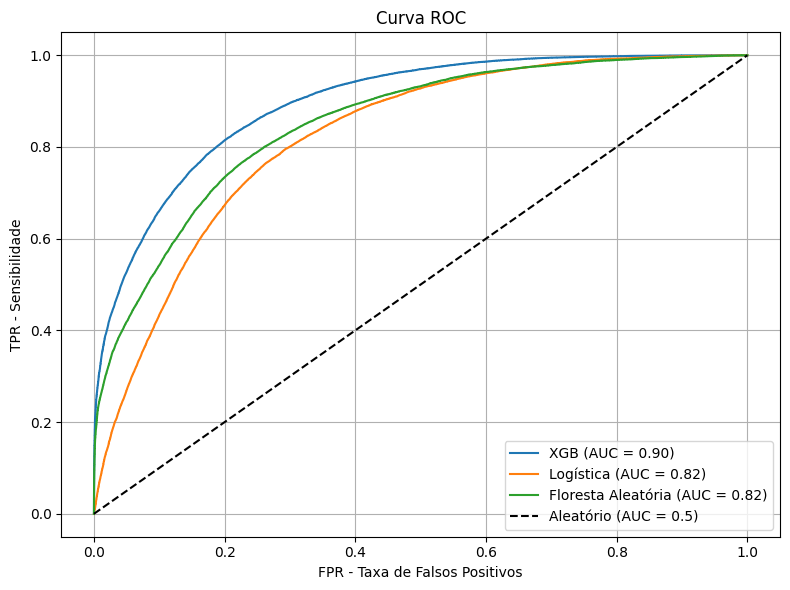

KS_XGB: 0.6148
KS_Logística: 0.5024
KS_Floresta: 0.5401


In [52]:
## Curva ROC

# Probabilidades da classe positiva (geralmente a segunda coluna [:,1])
prob_xgb = xgb.predict_proba(X_test_xgb)[:, 1]
prob_log = logistico_model.predict_proba(X_test_rl)[:, 1]
prob_fa = floresta.predict_proba(X_test_fa)[:, 1]

# Calcular pontos da curva ROC
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, prob_xgb)
fpr_log, tpr_log, _ = roc_curve(y_test, prob_log)
fpr_fa, tpr_fa, _ = roc_curve(y_test, prob_fa)

# Calcular AUC
auc_xgb = auc(fpr_xgb, tpr_xgb)
auc_log = auc(fpr_log, tpr_log)
auc_fa = auc(fpr_fa, tpr_fa)

# Plot da curva ROC
plot.figure(figsize=(8, 6))
plot.plot(fpr_xgb, tpr_xgb, label=f'XGB (AUC = {auc_xgb:.2f})')
plot.plot(fpr_log, tpr_log, label=f'Logística (AUC = {auc_log:.2f})')
plot.plot(fpr_fa, tpr_fa, label=f'Floresta Aleatória (AUC = {auc_log:.2f})')
plot.plot([0, 1], [0, 1], 'k--', label='Aleatório (AUC = 0.5)')
plot.xlabel('FPR - Taxa de Falsos Positivos')
plot.ylabel('TPR - Sensibilidade')
plot.title('Curva ROC')
plot.legend(loc='lower right')
plot.grid()
plot.tight_layout()
plot.show()

# KS
ks_xgb=max(tpr_xgb-fpr_xgb)
ks_log=max(tpr_log-fpr_log)
ks_fa=max(tpr_fa-fpr_fa)
print('KS_XGB:', builtins.round(ks_xgb, 4))
print('KS_Logística:', builtins.round(ks_log, 4))
print('KS_Floresta:', builtins.round(ks_fa, 4))

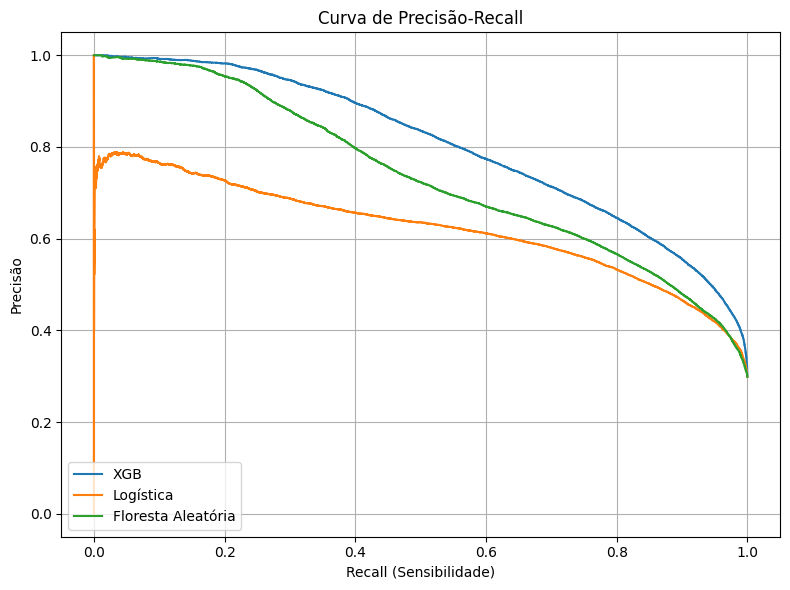

In [53]:
# Calcular pontos da curva Precision-Recall
prec_xgb, rec_xgb, ths_xgb = precision_recall_curve(y_test, prob_xgb)
prec_log, rec_log, ths_log = precision_recall_curve(y_test, prob_log)
prec_fa, rec_fa, ths_fa= precision_recall_curve(y_test, prob_fa)

# Plot da curva Precision-Recall
plot.figure(figsize=(8, 6))
plot.plot(rec_xgb, prec_xgb, label='XGB')
plot.plot(rec_log, prec_log, label='Logística')
plot.plot(rec_fa, prec_fa, label='Floresta Aleatória')
plot.xlabel('Recall (Sensibilidade)')
plot.ylabel('Precisão')
plot.title('Curva de Precisão-Recall')
plot.legend(loc='lower left')
plot.grid()
plot.tight_layout()
plot.show()

c:\Users\fernando.monteiro\deep-torch-example\KAB\Behavior_KAB\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


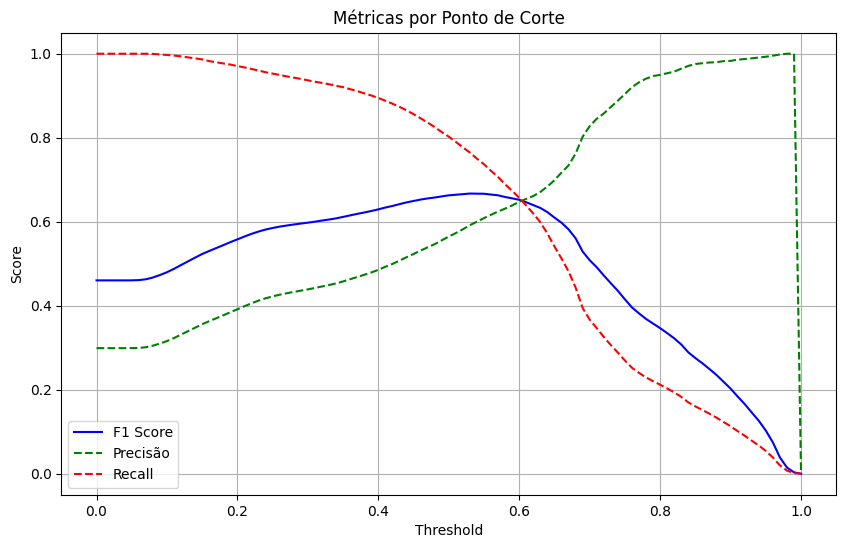

In [54]:
thresholds = np.arange(0.0, 1.01, 0.01)
f1_scores = []
precisions = []
recalls = []

for t in thresholds:
    preds = (prob_fa >= t).astype(int)
    f1_scores.append(f1_score(y_test, preds))
    precisions.append(precision_score(y_test, preds))
    recalls.append(recall_score(y_test, preds))
    
plot.figure(figsize=(10, 6))
plot.plot(thresholds, f1_scores, label='F1 Score', color='blue')
plot.plot(thresholds, precisions, label='Precisão', linestyle='--', color='green')
plot.plot(thresholds, recalls, label='Recall', linestyle='--', color='red')
plot.xlabel('Threshold')
plot.ylabel('Score')
plot.title('Métricas por Ponto de Corte')
plot.legend()
plot.grid(True)
plot.show()

In [55]:
# Converter listas para arrays
thresholds = np.array(thresholds)
f1_scores = np.array(f1_scores)
recalls = np.array(recalls)

# 1. Filtrar onde recall >= 0.80
idxs_validos = np.where(recalls >= 0.82)[0]

if len(idxs_validos) > 0:
    # 2. Pegar o índice do maior F1-score entre os válidos
    idx_melhor = idxs_validos[np.argmax(f1_scores[idxs_validos])]
    melhor_threshold_recall80 = thresholds[idx_melhor]
    melhor_f1 = f1_scores[idx_melhor]
    melhor_recall = recalls[idx_melhor]

    print(f"Melhor threshold com recall ≥ 80%: {melhor_threshold_recall80:.2f}")
    print(f"F1-score nesse threshold: {melhor_f1:.4f}")
    print(f"Recall nesse threshold: {melhor_recall:.4f}")
else:
    print("Nenhum threshold atinge recall ≥ 80%.") # trazer precisão

Melhor threshold com recall ≥ 80%: 0.48
F1-score nesse threshold: 0.6576
Recall nesse threshold: 0.8253


In [56]:
melhor_threshold_recall80 # fa_11 = 0.51 # fa_12 = 0.48 

np.float64(0.48)

C:\Users\fernando.monteiro\AppData\Local\Temp\ipykernel_20956\490711240.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_importancia, x='Importância', y='Variável', palette='viridis')


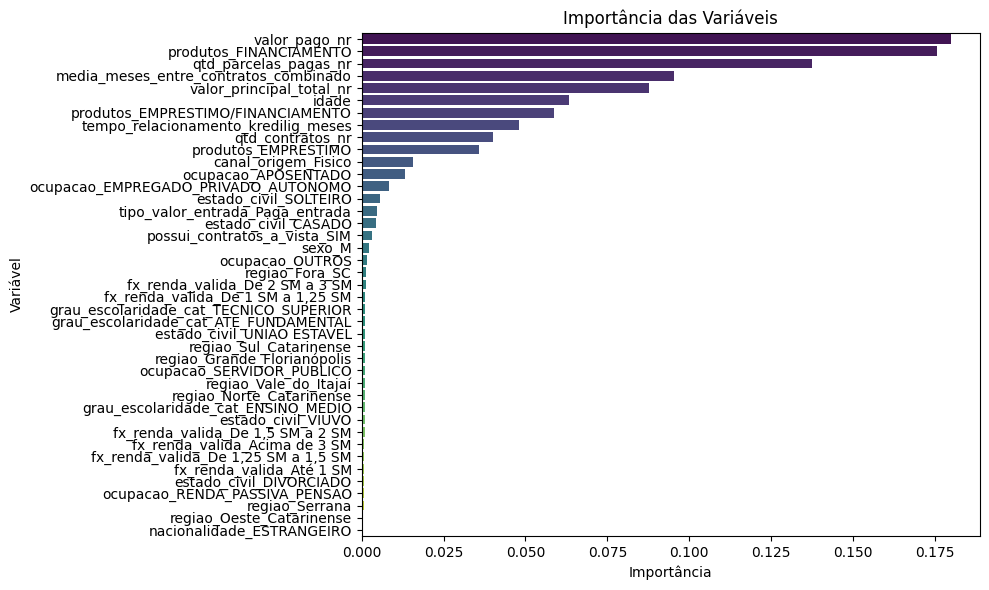

In [57]:
## Gráfico de Importância das Variáveis do melhor modelo

importancias = floresta.feature_importances_
nomes_variaveis = X_final_fa.columns

df_importancia = pd.DataFrame({
    'Variável': nomes_variaveis,
    'Importância': importancias
})

# Ordenar por importância
df_importancia = df_importancia.sort_values(by='Importância', ascending=False)

# Plot
plot.figure(figsize=(10, 6))
sns.barplot(data=df_importancia, x='Importância', y='Variável', palette='viridis')
plot.title('Importância das Variáveis')
plot.xlabel('Importância')
plot.ylabel('Variável')
plot.tight_layout()
plot.show()

#### Pontuação Treino 

In [58]:
#prob = xgb.predict_proba(X_final_xgb)[:, 1]
prob = floresta.predict_proba(X_final_fa)[:, 1]
X_train_comp = pd.DataFrame()
X_train_comp["id_cliente"] = ids_train.values
X_train_comp["PD"] = prob
X_train_comp["inad_e_reneg_prev"] = np.where(
    (X_train_comp["PD"] > melhor_threshold_recall80),
    1, 0
)
X_train_comp["Modelo"] = "Floresta"
#X_train_comp['rotulo_predito_base'] = xgb.predict(X_final_xgb)
X_train_comp['rotulo_predito_base'] = floresta.predict(X_final_fa)

In [59]:
X_train_comp=X_train_comp.rename(columns={"id_cliente":"cpf_cnpj"})
relatorio_prob_inad_train=df_train.merge(X_train_comp,on="cpf_cnpj")

In [60]:
pd.crosstab(
    relatorio_prob_inad_train["inad_e_reneg"],
    relatorio_prob_inad_train["inad_e_reneg_prev"],
    colnames=["Real"],
    rownames=["Previsto"],
    margins=True,
    #normalize='index'  # ou 'columns' ou 'all' # porcentagem
)
#trazer os valores shap

Real,0,1,All
Previsto,,,
0,107233,43441,150674
1,10752,53885,64637
All,117985,97326,215311


In [61]:
labels = [0, 1]
cm_floresta = confusion_matrix(relatorio_prob_inad_train["inad_e_reneg"], relatorio_prob_inad_train["inad_e_reneg_prev"],labels=labels)
tn_fa, fp_fa, fn_fa, tp_fa = cm_floresta.ravel()
especificidade_fa = tn_fa / (tn_fa + fp_fa)
recall_fa = recall_score(relatorio_prob_inad_train["inad_e_reneg"], relatorio_prob_inad_train["inad_e_reneg_prev"])
accuracy_fa=accuracy_score(relatorio_prob_inad_train["inad_e_reneg"], relatorio_prob_inad_train["inad_e_reneg_prev"])
roc_fa=roc_auc_score(relatorio_prob_inad_train["inad_e_reneg"], relatorio_prob_inad_train["inad_e_reneg_prev"])
tx_inad_e_reneg=relatorio_prob_inad_train["inad_e_reneg"].mean()
import builtins

# Montar um dicionário com os resultados
resultados = {
    "PERIODO_MOVIMENTO": ["2025-08-01"],
    "MODELO": ["Floresta"],
    "SENSIBILIDADE": [builtins.round(recall_fa, 4)*100],
    "ESPECIFICIDADE": [builtins.round(especificidade_fa, 4)*100],
    "ACURACIA": [builtins.round(accuracy_fa, 4)*100],
    "AUC": [builtins.round(roc_fa, 4)*100],
    "VN": [tn_fa],
    "FP": [fp_fa],
    "FN": [fn_fa],
    "VP": [tp_fa],
    "TX_INAD_E_RENEG":[builtins.round(tx_inad_e_reneg,4)*100],
}

# Criar DataFrame
df_resultados = pd.DataFrame(resultados)

# Mostrar como tabela
df_resultados

,PERIODO_MOVIMENTO,MODELO,SENSIBILIDADE,ESPECIFICIDADE,ACURACIA,AUC,VN,FP,FN,VP,TX_INAD_E_RENEG
0,2025-08-01,Floresta,83.37,71.17,74.83,77.27,107233,43441,10752,53885,30.02


#### Pontuação Teste

In [62]:
#prob = xgb.predict_proba(X_test_xgb)[:, 1]
X_test_fa=X_test_d_select[X_final_fa.columns]
prob = floresta.predict_proba(X_test_fa)[:, 1]
X_test_comp = pd.DataFrame()
X_test_comp["id_cliente"] = ids_test.values
X_test_comp["PD"] = prob
X_test_comp["inad_e_reneg_prev"] = np.where(
    (X_test_comp["PD"] > melhor_threshold_recall80),
    1, 0
)
X_test_comp["Modelo"] = "Floresta"
#X_test_comp['rotulo_predito_base'] = xgb.predict(X_test_xgb)
X_test_comp['rotulo_predito_base'] = floresta.predict(X_test_fa)

In [63]:
X_test_comp=X_test_comp.rename(columns={"id_cliente":"cpf_cnpj"})
relatorio_prob_inad_test=df_test.merge(X_test_comp,on="cpf_cnpj")

In [64]:
pd.crosstab(
    relatorio_prob_inad_test["inad_e_reneg"],
    relatorio_prob_inad_test["inad_e_reneg_prev"],
    colnames=["Real"],
    rownames=["Previsto"],
    margins=True,
    #normalize='index'  # ou 'columns' ou 'all' # porcentagem
)
#trazer os valores shap

Real,0,1,All
Previsto,,,
0,45800,18888,64688
1,4819,22770,27589
All,50619,41658,92277


In [65]:
labels = [0, 1]
cm_floresta = confusion_matrix(relatorio_prob_inad_test["inad_e_reneg"], relatorio_prob_inad_test["inad_e_reneg_prev"],labels=labels)
tn_fa, fp_fa, fn_fa, tp_fa = cm_floresta.ravel()
especificidade_fa = tn_fa / (tn_fa + fp_fa)
recall_fa = recall_score(relatorio_prob_inad_test["inad_e_reneg"], relatorio_prob_inad_test["inad_e_reneg_prev"])
accuracy_fa=accuracy_score(relatorio_prob_inad_test["inad_e_reneg"], relatorio_prob_inad_test["inad_e_reneg_prev"])
roc_fa=roc_auc_score(relatorio_prob_inad_test["inad_e_reneg"], relatorio_prob_inad_test["inad_e_reneg_prev"])
tx_inad_e_reneg=relatorio_prob_inad_test["inad_e_reneg"].mean()
import builtins

# Montar um dicionário com os resultados
resultados = {
    "PERIODO_MOVIMENTO": ["2025-08-01"],
    "MODELO": ["Floresta"],
    "SENSIBILIDADE": [builtins.round(recall_fa, 4)*100],
    "ESPECIFICIDADE": [builtins.round(especificidade_fa, 4)*100],
    "ACURACIA": [builtins.round(accuracy_fa, 4)*100],
    "AUC": [builtins.round(roc_fa, 4)*100],
    "VN": [tn_fa],
    "FP": [fp_fa],
    "FN": [fn_fa],
    "VP": [tp_fa],
    "TX_INAD_E_RENEG":[builtins.round(tx_inad_e_reneg,4)*100],
}

# Criar DataFrame
df_resultados = pd.DataFrame(resultados)

# Mostrar como tabela
df_resultados

,PERIODO_MOVIMENTO,MODELO,SENSIBILIDADE,ESPECIFICIDADE,ACURACIA,AUC,VN,FP,FN,VP,TX_INAD_E_RENEG
0,2025-08-01,Floresta,82.53,70.80,74.31,76.67,45800,18888,4819,22770,29.90


# SHapley Additive exPlanations

### CPF específico

In [66]:
df_treino=X_final_fa.copy()
df_treino["id"]= ids_train.values
amostra=df_treino.sample(100, random_state=2025)
#amostra=df_treino[df_treino["id"]==4572208999]
cpfs = amostra["id"]
amostra.drop(columns=["id"], inplace=True)

In [67]:
cpfs.head(5)

74096    10177058951.00
86527     3779200961.00
124831    4253917950.00
176083    7202111900.00
179521     157251977.00
Name: id, dtype: float64

In [68]:
# Shap
shap.initjs()
# Objeto explainer - XGBoost:TreeExplainer, Floresta Aleatoria:Explainer, Regressão Logística: LinearExplainer
explainer = shap.TreeExplainer(floresta)
# Calcular os valores SHAP no conjunto de treino
shap_values = explainer(amostra)

In [69]:
for i_shap, col in enumerate(shap_values.feature_names):
    if col in num_cols:
        i_scaler = num_cols.index(col)  # posição da variável no scaler
        shap_values.data[:, i_shap] = (
            shap_values.data[:, i_shap] * scaler.scale_[i_scaler] + scaler.mean_[i_scaler]
        )

In [70]:
# cpfs
cpfs = cpfs.values

In [71]:
amostra.columns

Index(['idade', 'tempo_relacionamento_kredilig_meses',
       'media_meses_entre_contratos_combinado', 'valor_pago_nr',
       'valor_principal_total_nr', 'qtd_contratos_nr', 'qtd_parcelas_pagas_nr',
       'sexo_M', 'estado_civil_CASADO', 'estado_civil_DIVORCIADO',
       'estado_civil_SOLTEIRO', 'estado_civil_UNIAO ESTAVEL',
       'estado_civil_VIUVO', 'nacionalidade_ESTRANGEIRO',
       'canal_origem_Fisico', 'produtos_EMPRESTIMO',
       'produtos_EMPRESTIMO/FINANCIAMENTO', 'produtos_FINANCIAMENTO',
       'ocupacao_APOSENTADO', 'ocupacao_EMPREGADO_PRIVADO_AUTONOMO',
       'ocupacao_OUTROS', 'ocupacao_RENDA_PASSIVA_PENSAO',
       'ocupacao_SERVIDOR_PUBLICO', 'grau_escolaridade_cat_ATE_FUNDAMENTAL',
       'grau_escolaridade_cat_ENSINO_MEDIO',
       'grau_escolaridade_cat_TECNICO_SUPERIOR', 'regiao_Fora_SC',
       'regiao_Grande_Florianópolis', 'regiao_Norte_Catarinense',
       'regiao_Oeste_Catarinense', 'regiao_Serrana', 'regiao_Sul_Catarinense',
       'regiao_Vale_do_Itaja

In [72]:
# Associa os shap values aos CPFs
shap_df = pd.DataFrame(shap_values.values[:, :, 1], index=cpfs, columns=amostra.columns)

In [73]:
shap_df.sample(5)

,idade,tempo_relacionamento_kredilig_meses,media_meses_entre_contratos_combinado,valor_pago_nr,valor_principal_total_nr,qtd_contratos_nr,qtd_parcelas_pagas_nr,sexo_M,estado_civil_CASADO,estado_civil_DIVORCIADO,estado_civil_SOLTEIRO,estado_civil_UNIAO ESTAVEL,estado_civil_VIUVO,nacionalidade_ESTRANGEIRO,canal_origem_Fisico,produtos_EMPRESTIMO,produtos_EMPRESTIMO/FINANCIAMENTO,produtos_FINANCIAMENTO,ocupacao_APOSENTADO,ocupacao_EMPREGADO_PRIVADO_AUTONOMO,ocupacao_OUTROS,ocupacao_RENDA_PASSIVA_PENSAO,ocupacao_SERVIDOR_PUBLICO,grau_escolaridade_cat_ATE_FUNDAMENTAL,grau_escolaridade_cat_ENSINO_MEDIO,grau_escolaridade_cat_TECNICO_SUPERIOR,regiao_Fora_SC,regiao_Grande_Florianópolis,regiao_Norte_Catarinense,regiao_Oeste_Catarinense,regiao_Serrana,regiao_Sul_Catarinense,regiao_Vale_do_Itajaí,tipo_valor_entrada_Paga_entrada,possui_contratos_a_vista_SIM,fx_renda_valida_Acima de 3 SM,fx_renda_valida_Até 1 SM,"fx_renda_valida_De 1 SM a 1,25 SM","fx_renda_valida_De 1,25 SM a 1,5 SM","fx_renda_valida_De 1,5 SM a 2 SM",fx_renda_valida_De 2 SM a 3 SM
3877330940.00,0.02,0.02,-0.08,-0.06,-0.02,-0.01,-0.03,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.01,0.03,0.08,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00
45906246134.00,-0.05,0.02,0.02,-0.03,-0.00,-0.03,0.01,0.01,0.01,0.00,-0.01,0.01,0.00,-0.00,-0.00,-0.02,-0.04,-0.12,0.01,0.01,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00
80179224930.00,0.03,0.03,-0.08,-0.04,0.02,0.02,-0.04,-0.00,0.00,0.00,0.01,-0.00,0.00,0.00,-0.00,-0.01,0.04,0.09,0.01,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00
55381030991.00,-0.05,0.01,-0.05,-0.07,0.01,0.02,-0.04,0.00,-0.01,0.00,-0.01,-0.00,0.00,-0.00,-0.00,-0.02,-0.04,-0.13,0.01,0.01,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00
9759385929.00,0.04,0.02,-0.01,-0.00,0.02,0.02,-0.03,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.01,0.04,0.08,0.01,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00


In [74]:
# Adiciona o CPF como primeira coluna
shap_df.insert(0, "cpf_cnpj", cpfs)

In [75]:
shap_df.head()

,cpf_cnpj,idade,tempo_relacionamento_kredilig_meses,media_meses_entre_contratos_combinado,valor_pago_nr,valor_principal_total_nr,qtd_contratos_nr,qtd_parcelas_pagas_nr,sexo_M,estado_civil_CASADO,estado_civil_DIVORCIADO,estado_civil_SOLTEIRO,estado_civil_UNIAO ESTAVEL,estado_civil_VIUVO,nacionalidade_ESTRANGEIRO,canal_origem_Fisico,produtos_EMPRESTIMO,produtos_EMPRESTIMO/FINANCIAMENTO,produtos_FINANCIAMENTO,ocupacao_APOSENTADO,ocupacao_EMPREGADO_PRIVADO_AUTONOMO,ocupacao_OUTROS,ocupacao_RENDA_PASSIVA_PENSAO,ocupacao_SERVIDOR_PUBLICO,grau_escolaridade_cat_ATE_FUNDAMENTAL,grau_escolaridade_cat_ENSINO_MEDIO,grau_escolaridade_cat_TECNICO_SUPERIOR,regiao_Fora_SC,regiao_Grande_Florianópolis,regiao_Norte_Catarinense,regiao_Oeste_Catarinense,regiao_Serrana,regiao_Sul_Catarinense,regiao_Vale_do_Itajaí,tipo_valor_entrada_Paga_entrada,possui_contratos_a_vista_SIM,fx_renda_valida_Acima de 3 SM,fx_renda_valida_Até 1 SM,"fx_renda_valida_De 1 SM a 1,25 SM","fx_renda_valida_De 1,25 SM a 1,5 SM","fx_renda_valida_De 1,5 SM a 2 SM",fx_renda_valida_De 2 SM a 3 SM
10177058951.00,10177058951.00,0.04,-0.01,-0.09,0.01,0.02,0.02,-0.05,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.04,-0.01,0.03,0.07,0.01,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00
3779200961.00,3779200961.00,0.02,-0.04,-0.09,-0.06,0.01,0.01,-0.04,-0.00,-0.01,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.01,-0.05,-0.14,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00
4253917950.00,4253917950.00,0.02,-0.01,0.02,0.10,-0.03,-0.02,0.07,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.02,-0.02,0.04,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00
7202111900.00,7202111900.00,0.04,0.02,0.03,0.21,0.04,0.00,0.17,0.00,0.00,0.00,-0.01,0.00,0.00,-0.00,-0.00,-0.00,-0.02,-0.04,0.01,0.01,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00
157251977.00,157251977.00,0.03,0.01,0.03,-0.09,0.01,0.01,-0.05,0.00,-0.01,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.01,-0.05,-0.14,0.01,-0.01,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00


In [76]:
shap_df_completo=shap_df.merge(relatorio_prob_inad_train, left_on="cpf_cnpj", right_on="cpf_cnpj", how="left")

In [77]:
#shap_df_completo.to_excel('shap_df_amostra.xlsx')

In [78]:
# CPF específico
cpf_especifico = 4253917950 #ids_train.values[1]
shap_cliente = shap_df.loc[cpf_especifico]
i = shap_df.index.get_loc(cpf_especifico)
exp = shap_values[i]
i

2

In [79]:
'''xs = np.linspace(-4,4 ,100)
plot.xlabel("Probabilidades de Inadimplência logarítmicas")
plot.ylabel("Probabilidade de Inadimplência")
plot.title("Como mudanças nas probabilidades logarítmicas se convertem em probabilidade de Inadimplência")
plot.plot(xs,1/(1+np.exp(-xs)))
plot.show()'''

'xs = np.linspace(-4,4 ,100)\nplot.xlabel("Probabilidades de Inadimplência logarítmicas")\nplot.ylabel("Probabilidade de Inadimplência")\nplot.title("Como mudanças nas probabilidades logarítmicas se convertem em probabilidade de Inadimplência")\nplot.plot(xs,1/(1+np.exp(-xs)))\nplot.show()'

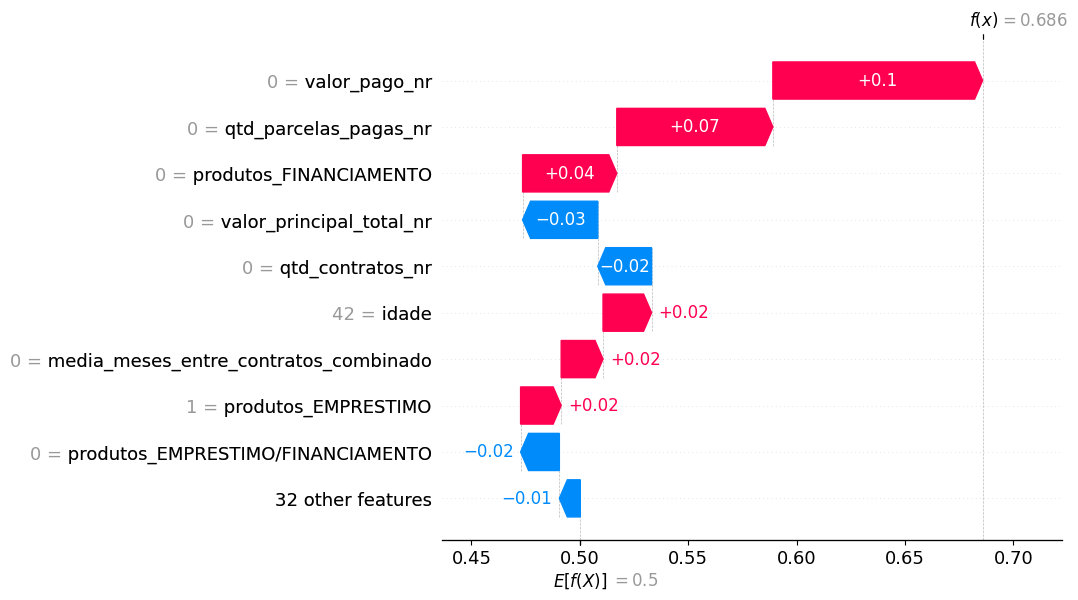

' # No caso do Xgboost converter as saídas para probabilidades\nfx = exp.base_values + exp.values.sum()\nprob = expit(fx)\n\nprint(f"Probabilidade prevista: {prob[0]:.2%}")'

In [80]:
shap.plots.waterfall(shap_values[i, :, 1])

''' # No caso do Xgboost converter as saídas para probabilidades
fx = exp.base_values + exp.values.sum()
prob = expit(fx)

print(f"Probabilidade prevista: {prob[0]:.2%}")'''

In [81]:
cpf_especifico

4253917950

In [82]:
relatorio_prob_inad_train[relatorio_prob_inad_train["cpf_cnpj"] == cpf_especifico]

,sexo,idade,estado_civil,nacionalidade,tempo_relacionamento_kredilig_meses,situacao_conta,canal_origem,limite_total,limite_total_utilizado,media_meses_entre_contratos_combinado,qtd_contratos_fechado_regular,qtd_reneg_aberto_regular,valor_da_parcela_aberto,principal_total_fechado,qtd_parcelas_pagas,media_atraso_dias,meses_ultimo_pagamento,meses_entre_primeiro_e_ultimo_pagamento,meses_entre_primeiro_e_ultimo_fechamento,valor_pago_nr,valor_principal_total_nr,FIN_valor_medio_entrada_nr,renda_valida_new,produtos,qtd_total_fechado_a_vista,mean_dias_maior_atraso,qtd_contratos,limite_total_primeiro_mes,limite_total_ultimo_mes,qtd_contratos_nr,qtd_cartao_antecipacao,qtd_parcelas_pagas_nr,ocupacao,grau_escolaridade_cat,regiao,tipo_cal_entre_contratos,tipo_valor_entrada,mean_atraso_possui_info,possui_contratos_a_vista,possui_antecipacao,principal_total,cpf_cnpj,inad_e_reneg,fx_renda_valida,fx_principal_total_nr,fx_principal_total,fx_ult_limite,Cluster,PD,inad_e_reneg_prev,Modelo,rotulo_predito_base
124831,M,42,CASADO,BRASILEIRO,72.00,Bloqueada,Fisico,0.00,0.00,0.00,0,0,0.00,171.49,1,0.00,2.00,0.00,2.00,0.00,0.00,0.00,1895.51,EMPRESTIMO,0,0.00,1,7000.00,7000.00,0,1.00,0,EMPREGADO_PRIVADO_AUTONOMO,ENSINO_MEDIO,Norte_Catarinense,Apenas_1_contrato,N_Paga_entrada,SIM,NAO,SIM,171.49,4253917950.00,0,"De 1 SM a 1,25 SM",0,Até R$1 mil,"R$5 mil a R$7,5 mil",1,0.69,1,Floresta,1


In [83]:
#df_mean=pd.read_csv(r'C:\Users\fernando.monteiro\deep-torch-example\KAB\Behavior_KAB\media_maior_atraso_202507.csv',sep = ';')

In [84]:
#df_parquet=pd.read_parquet(r'C:\Users\fernando.monteiro\deep-torch-example\KAB\Behavior_KAB\df_maior_atraso_ate_60_202507.parquet')

In [85]:
#df_parquet[df_parquet["cpf_cnpj"]==cpf_especifico].sort_values(by="id_contrato")

In [86]:
#df_mean[df_mean["cpf_cnpj"]==cpf_especifico].head()

In [87]:
#shap.plots.force(shap_values[i, :, 1],matplotlib=True)

### Estudo das Variáveis

In [88]:
#plot.style.use('default')  # fundo branco
#shap.plots.force(shap_values[:500])

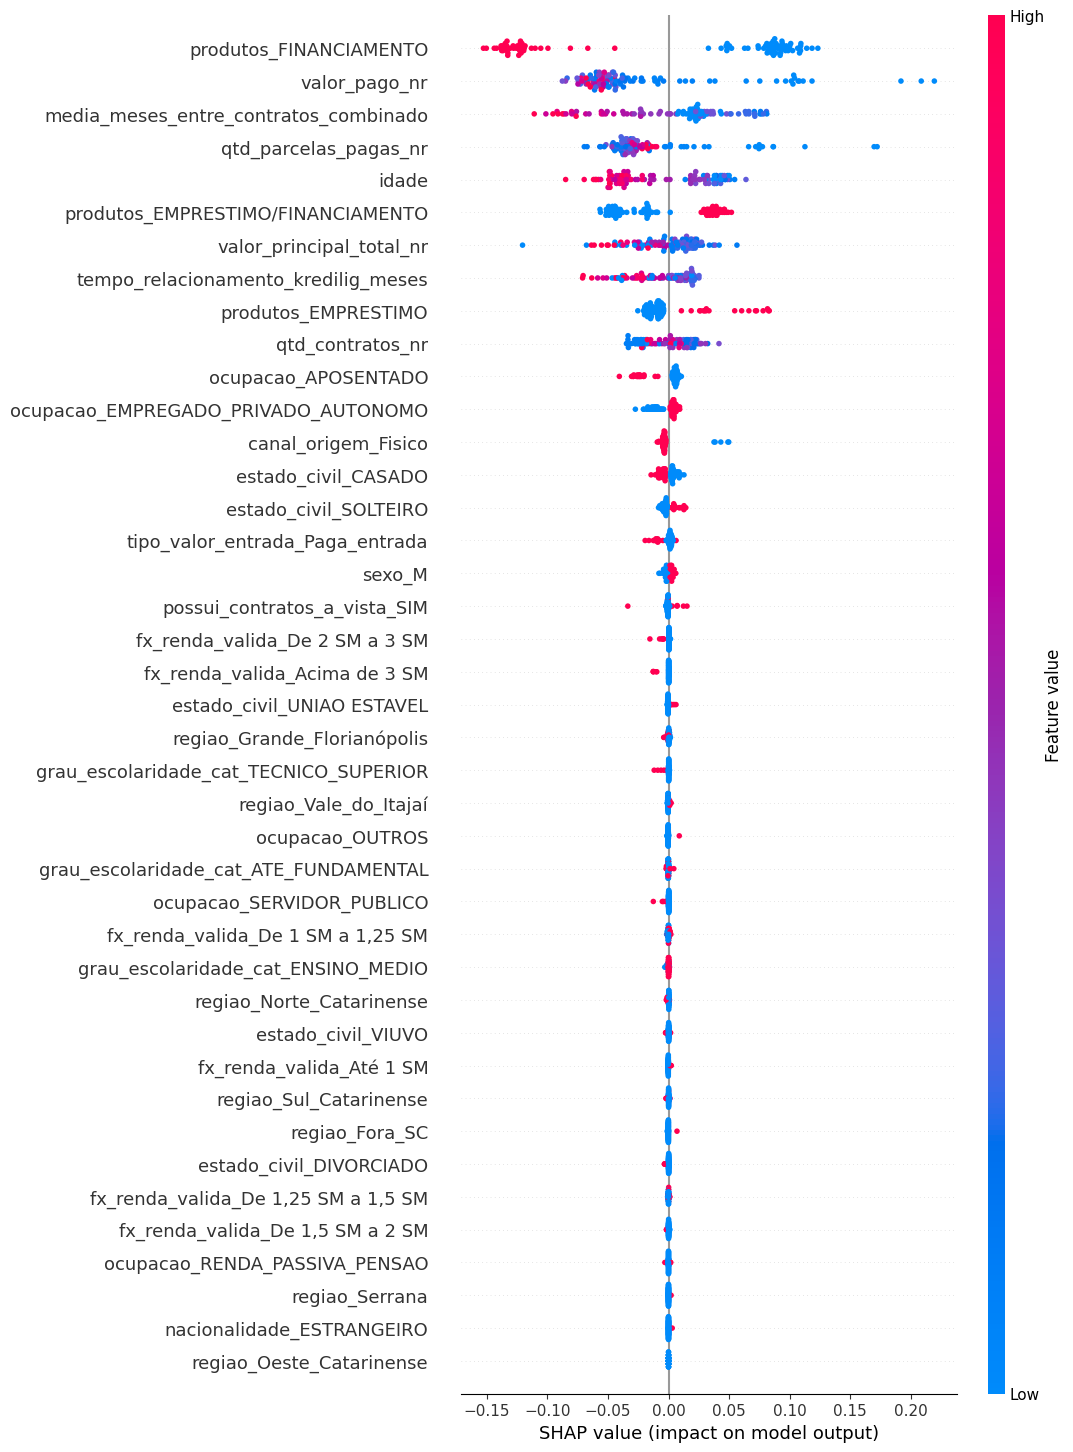

In [89]:
# Seleciona apenas os shap values da classe 1
shap_beeswarm = shap.Explanation(
    values=shap_values.values[:, :, 1],          # só a classe positiva
    base_values=shap_values.base_values[:, 1],   # idem
    data=shap_values.data,
    feature_names=shap_values.feature_names
)

# Agora o beeswarm funciona
shap.plots.beeswarm(shap_beeswarm,max_display=50)

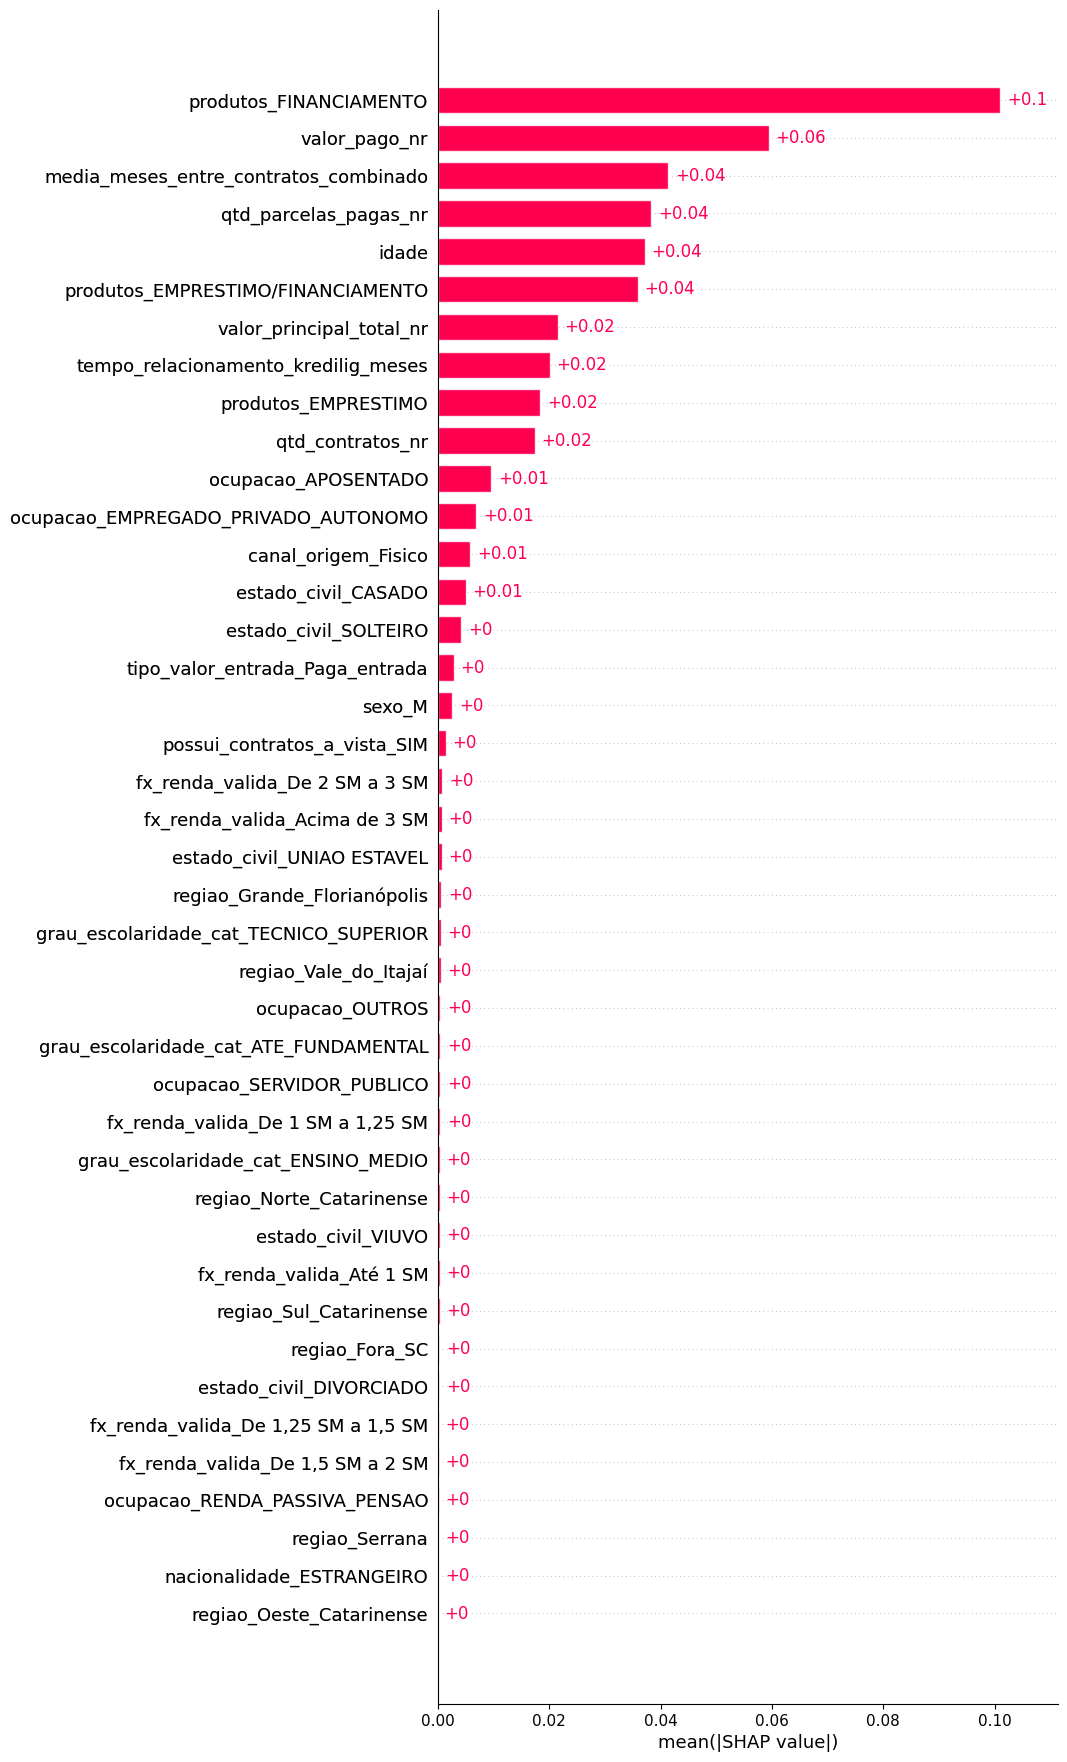

In [90]:
# Reduz shap_values para só a classe positiva
shap_bar = shap.Explanation(
    values=shap_values.values[:, :, 1],          # shap da classe 1
    base_values=shap_values.base_values[:, 1],   # base da classe 1
    data=shap_values.data,
    feature_names=shap_values.feature_names
)

# Agora roda o bar plot
shap.plots.bar(shap_bar,max_display=50)

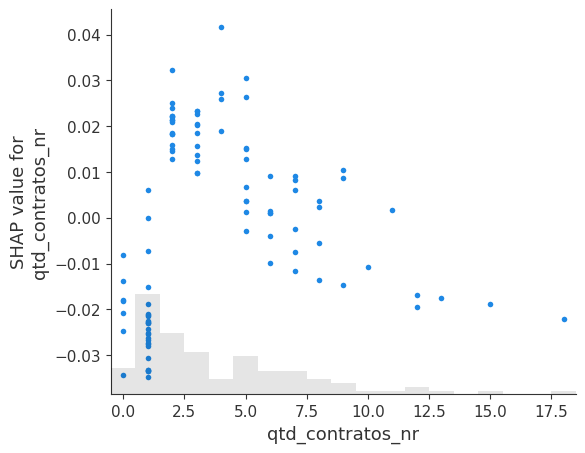

In [91]:
['qtd_contratos_fechado_regular',
 'meses_ultimo_pagamento',
 'produtos_FINANCIAMENTO',
 'mean_dias_maior_atraso',
 'valor_pago_nr',
 'qtd_parcelas_pagas_nr',
 'media_meses_entre_contratos_combinado',
 'qtd_contratos_nr',
 'produtos_EMPRESTIMO/FINANCIAMENTO',
 'idade',
 'tempo_relacionamento_kredilig_meses',
 'produtos_EMPRESTIMO',
 'fx_principal_total_nr_0',
 'canal_origem_Fisico',
 'fx_principal_total_nr_Até R$2 mil',
 'possui_contratos_a_vista_SIM',
 'ocupacao_APOSENTADO',
 'fx_principal_total_nr_R$2 mil a R$5mil',
 'ocupacao_EMPREGADO_PRIVADO_AUTONOMO',
 'fx_principal_total_nr_R$5 mil a R$10mil',
 'tipo_valor_entrada_Paga_entrada',
 'fx_principal_total_nr_R$10 mil a R$20mil',
 'estado_civil_SOLTEIRO',
 'estado_civil_CASADO',
 'fx_principal_total_nr_Acima de R$20mil',
 'regiao_Fora_SC',
 'sexo_M']

shap_values_class1 = shap.Explanation(
    values=shap_values.values[:, :, 1],
    base_values=shap_values.base_values[:, 1],
    data=shap_values.data,
    feature_names=shap_values.feature_names
)

feature_name = "qtd_contratos_nr"
feature_index = X_final_fa.columns.get_loc(feature_name)
shap.plots.scatter(shap_values_class1[:, feature_index])

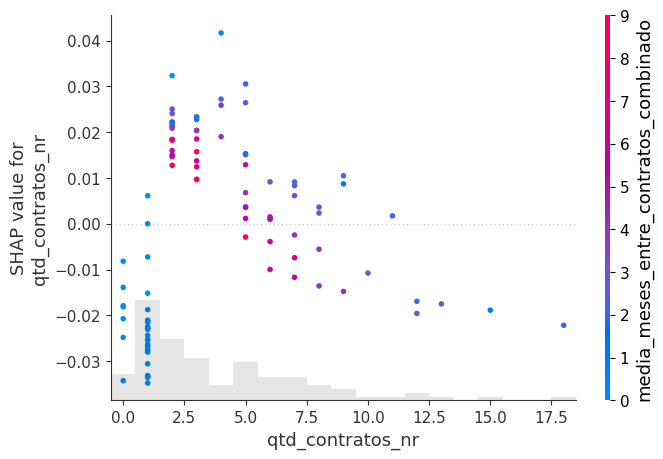

In [92]:
shap.plots.scatter(shap_values_class1[:, feature_index], color=shap_values_class1)

# Escoragem

## Treino

In [93]:
'''Z = xgb.predict(X_final_xgb, output_margin=True)
Z_min, Z_max = Z.min(), Z.max()
maior_absoluto = int(np.ceil(max(abs(Z_min), abs(Z_max))))
SCR = np.round(1000 * ((-Z + maior_absoluto) / (maior_absoluto*2)))
relatorio_prob_inad_train["Z"]=Z
relatorio_prob_inad_train["SCR"]=SCR'''

'''Z_prob = floresta.predict_proba(X_final_fa)[:, 1]  # probabilidade da classe positiva

Z = Z_prob * 2 - 1  # agora Z varia entre -1 e +1 (simulando margem)
Z_min, Z_max = Z.min(), Z.max()
maior_absoluto = int(np.ceil(max(abs(Z_min), abs(Z_max))))

# Transformar em SCR (0 a 1000)
SCR = np.round(1000 * ((-Z + maior_absoluto) / (maior_absoluto*2)))

# Adicionar ao DataFrame
relatorio_prob_inad_train["Z"] = Z
relatorio_prob_inad_train["SCR"] = SCR'''"resumo_dados_saida ED.html"

prob = floresta.predict_proba(X_final_fa)[:, 1]
Z = np.log((1 - prob) / prob)
odds = (1 - prob) / prob

# Estatísticas das odds
odds_median = np.median(odds)

PDO = 50
Factor = PDO / np.log(2)
BaseScore = 600 - Factor * np.log(odds_median)

# Transformar em SCR (0 a 1000)
SCR = BaseScore + Factor * Z

# Garantir que fique entre 0 e 1000
SCR = np.clip(SCR, 0, 1000)

# Adicionar ao DataFrame
relatorio_prob_inad_train["Z"] = Z
relatorio_prob_inad_train["SCR"] = SCR
relatorio_prob_inad_train["PD"] = prob

In [94]:
odds_median # fa_11=1.346142765921842  fa_12 = 1.2576211068606467

np.float64(1.2576211068606467)

In [133]:
odds_threshold = {"threshold": melhor_threshold_recall80, "odds_median": odds_median}

In [135]:
joblib.dump(odds_threshold, 'odds_threshold.pkl')

['odds_threshold.pkl']

In [95]:
relatorio_prob_inad_train[["PD","Z","SCR"]].sample(5)

,PD,Z,SCR
149156,0.47,0.13,593.05
51424,0.53,-0.14,573.54
135862,0.23,1.23,671.94
62494,0.19,1.44,687.70
23589,0.44,0.23,600.40


In [96]:
relatorio_prob_inad_train.describe()

,idade,tempo_relacionamento_kredilig_meses,limite_total,limite_total_utilizado,media_meses_entre_contratos_combinado,qtd_contratos_fechado_regular,qtd_reneg_aberto_regular,valor_da_parcela_aberto,principal_total_fechado,qtd_parcelas_pagas,media_atraso_dias,meses_ultimo_pagamento,meses_entre_primeiro_e_ultimo_pagamento,meses_entre_primeiro_e_ultimo_fechamento,valor_pago_nr,valor_principal_total_nr,FIN_valor_medio_entrada_nr,renda_valida_new,qtd_total_fechado_a_vista,mean_dias_maior_atraso,qtd_contratos,limite_total_primeiro_mes,limite_total_ultimo_mes,qtd_contratos_nr,qtd_cartao_antecipacao,qtd_parcelas_pagas_nr,principal_total,cpf_cnpj,inad_e_reneg,Cluster,PD,inad_e_reneg_prev,rotulo_predito_base,Z,SCR
count,215311.00,215311.00,215311.00,215311.00,215311.00,215311.00,215311.00,215311.00,215311.00,215311.00,215311.00,215311.00,215311.00,215311.00,215311.00,215311.00,215311.00,215311.00,215311.00,215311.00,215311.00,215311.00,215311.00,215311.00,215311.00,215311.00,215311.00,215311.00,215311.00,215311.00,215311.00,215311.00,215311.00,215311.00,215311.00
mean,51.12,53.98,5514.00,1786.56,4.28,2.24,0.12,255.70,4579.30,40.94,35.95,9.26,20.45,29.64,5997.10,5677.50,32.34,2078.52,0.15,7.97,4.94,6485.96,7721.67,3.74,0.22,33.80,7438.11,33950115379.07,0.30,1.73,0.44,0.45,0.43,0.32,606.71
std,15.93,30.32,6349.18,3927.97,5.44,3.48,0.53,347.51,7511.81,54.23,98.50,11.08,13.05,10.08,7821.06,6830.03,177.05,775.28,1.46,10.09,5.80,4740.34,5718.31,4.47,1.27,43.63,9828.32,32233605219.89,0.46,1.37,0.24,0.50,0.49,1.28,92.36
min,18.00,12.00,0.00,-1195.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,508.20,0.00,0.00,1.00,8.57,180.00,0.00,0.00,0.00,0.01,1468707.00,0.00,0.00,0.03,0.00,0.00,-5.37,195.94
25%,39.00,28.00,0.00,0.00,0.00,0.00,0.00,0.00,764.79,10.00,0.67,1.00,10.00,21.00,1238.84,1520.00,0.00,1558.70,0.00,0.23,1.00,3000.00,3906.00,1.00,0.00,9.00,2021.01,5318523449.50,0.00,1.00,0.20,0.00,0.00,-0.58,541.73
50%,52.00,48.00,4488.00,0.00,2.84,1.00,0.00,160.16,2463.00,23.00,4.00,4.00,19.00,33.00,3552.65,3619.37,0.00,1888.00,0.00,3.58,3.00,5724.00,6804.00,2.00,0.00,20.00,4457.75,14782289707.00,0.00,1.00,0.44,0.00,0.00,0.23,600.00
75%,63.00,77.00,8800.00,1902.10,6.29,3.00,0.00,365.00,5648.91,51.00,18.79,16.00,33.00,39.00,7868.88,7436.07,0.00,2194.08,0.00,12.50,6.00,8520.00,10104.00,5.00,0.00,44.00,9214.03,63944636995.50,1.00,3.00,0.64,1.00,1.00,1.41,685.21
max,100.00,126.00,100000.00,83391.92,41.07,125.00,17.00,15803.40,310660.49,1410.00,1199.00,42.00,42.00,42.00,310434.77,289360.52,7200.00,26111.28,96.00,60.00,181.00,60000.00,100000.00,145.00,51.00,1410.00,329851.85,99997908953.00,1.00,4.00,1.00,1.00,1.00,3.40,828.53


In [97]:
relatorio_prob_inad_train["fx_SCR"], bins =pd.qcut(relatorio_prob_inad_train.SCR,q=20, retbins=True) # categorização por quantil
# expandir os extremos
bins[0] = -np.inf
bins[-1] = np.inf
np.save("bins_SCR.npy", bins)
relatorio_prob_inad_train["fx_PD"], bins_prob =pd.qcut(relatorio_prob_inad_train.PD,q=10, retbins=True) # categorização por quantil
# expandir os extremos
bins_prob[0] = -np.inf
bins_prob[-1] = np.inf
np.save("bins_PD.npy", bins_prob)

In [98]:
relatorio_prob_inad_train.fx_PD.value_counts().sort_index()

fx_PD
(0.0314, 0.118]    21532
(0.118, 0.166]     21531
(0.166, 0.23]      21531
(0.23, 0.354]      21531
(0.354, 0.443]     21531
(0.443, 0.521]     21531
(0.521, 0.605]     21531
(0.605, 0.668]     21532
(0.668, 0.739]     21530
(0.739, 0.995]     21531
Name: count, dtype: int64

In [99]:
tab_cruz = pd.crosstab(relatorio_prob_inad_train["fx_SCR"], relatorio_prob_inad_train["inad_e_reneg"])
tab_cruz

inad_e_reneg,0,1
fx_SCR,,
"(195.938, 455.705]",204,10562
"(455.705, 508.495]",1780,8986
"(508.495, 525.606]",3643,7122
"(525.606, 533.025]",4980,5786
"(533.025, 541.733]",5391,5374
"(541.733, 552.84]",5854,4912
"(552.84, 565.593]",6422,4343
"(565.593, 577.405]",7031,3735
"(577.405, 588.77]",7813,2952


In [100]:
relatorio_prob_inad_train.to_csv("relatorio_prob_inad_train_2.csv", index=False)

## Teste

In [101]:
'''Z = xgb.predict(X_test_xgb, output_margin=True)
Z_min, Z_max = Z.min(), Z.max()
maior_absoluto = int(np.ceil(max(abs(Z_min), abs(Z_max))))
SCR = np.round(1000 * ((-Z + maior_absoluto) / (maior_absoluto*2)))
relatorio_prob_inad_test["Z"]=Z
relatorio_prob_inad_test["SCR"]=SCR'''

'''Z_prob = floresta.predict_proba(X_test_fa)[:, 1]  # probabilidade da classe positiva

Z = Z_prob * 2 - 1  # agora Z varia entre -1 e +1 (simulando margem)
Z_min, Z_max = Z.min(), Z.max()
maior_absoluto = int(np.ceil(max(abs(Z_min), abs(Z_max))))

# Transformar em SCR (0 a 1000)
SCR = np.round(1000 * ((-Z + maior_absoluto) / (maior_absoluto*2)))

# Adicionar ao DataFrame
relatorio_prob_inad_test["Z"] = Z
relatorio_prob_inad_test["SCR"] = SCR'''

prob_test = floresta.predict_proba(X_test_fa)[:, 1]
Z_test = np.log((1 - prob_test) / prob_test)

# Transformar em SCR (0 a 1000)
SCR_test = BaseScore + Factor * Z_test

# Garantir que fique entre 0 e 1000
SCR_test = np.clip(SCR_test, 0, 1000)

# Adicionar ao DataFrame
relatorio_prob_inad_test["Z"] = Z_test
relatorio_prob_inad_test["SCR"] = SCR_test
relatorio_prob_inad_test["PD"] = prob_test

In [102]:
bins_carregado = np.load(r"bins_SCR.npy")
relatorio_prob_inad_test["fx_SCR"]=pd.cut(relatorio_prob_inad_test.SCR, bins=bins_carregado)
bins_carregado_PD = np.load(r"bins_PD.npy")
relatorio_prob_inad_test["fx_PD"]=pd.cut(relatorio_prob_inad_test.PD, bins=bins_carregado_PD)

In [103]:
relatorio_prob_inad_test.fx_SCR.value_counts().sort_index()

fx_SCR
(-inf, 455.705]       4433
(455.705, 508.495]    4602
(508.495, 525.606]    4470
(525.606, 533.025]    4934
(533.025, 541.733]    4485
(541.733, 552.84]     4583
(552.84, 565.593]     4603
(565.593, 577.405]    4606
(577.405, 588.77]     4750
(588.77, 600.0]       4518
(600.0, 612.087]      4605
(612.087, 626.832]    4482
(626.832, 649.325]    4662
(649.325, 670.767]    4572
(670.767, 685.208]    4671
(685.208, 700.045]    4698
(700.045, 713.91]     4608
(713.91, 728.449]     4914
(728.449, 744.724]    4570
(744.724, inf]        4511
Name: count, dtype: int64

In [104]:
tab_cruz_test = pd.crosstab(relatorio_prob_inad_test["fx_SCR"], relatorio_prob_inad_test["inad_e_reneg"])
tab_cruz_test

inad_e_reneg,0,1
fx_SCR,,
"(-inf, 455.705]",106,4327
"(455.705, 508.495]",917,3685
"(508.495, 525.606]",1626,2844
"(525.606, 533.025]",2333,2601
"(533.025, 541.733]",2229,2256
"(541.733, 552.84]",2401,2182
"(552.84, 565.593]",2666,1937
"(565.593, 577.405]",3030,1576
"(577.405, 588.77]",3434,1316


In [105]:
#relatorio_prob_inad_test[["id_cliente","inad_reneg_real","SCR","fx_SCR"]].to_excel("amostraSCR_regiao.xlsx")

In [106]:
relatorio_prob_inad_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92277 entries, 0 to 92276
Data columns (total 56 columns):
 #   Column                                    Non-Null Count  Dtype   
---  ------                                    --------------  -----   
 0   sexo                                      92277 non-null  object  
 1   idade                                     92277 non-null  int64   
 2   estado_civil                              92277 non-null  object  
 3   nacionalidade                             92277 non-null  object  
 4   tempo_relacionamento_kredilig_meses       92277 non-null  float64 
 5   situacao_conta                            92277 non-null  object  
 6   canal_origem                              92277 non-null  object  
 7   limite_total                              92277 non-null  float64 
 8   limite_total_utilizado                    92277 non-null  float64 
 9   media_meses_entre_contratos_combinado     92277 non-null  float64 
 10  qtd_contratos_fechado_

In [107]:
relatorio_prob_inad_test.to_csv("relatorio_prob_inad_test_2.csv", index=False)

# Limites

## Treino

In [108]:
#thresholds=np.arange(0, 1.01, 0.01)

In [109]:
relatorio_limites_train=relatorio_prob_inad_train.copy()

In [110]:
#relatorio_limites_train["fx_risco"]= pd.cut(relatorio_limites_train["PD"], bins=thresholds, include_lowest=True)

In [111]:
relatorio_limites_train["fx_risco"], bins_risco =pd.qcut(relatorio_limites_train.SCR,q=100, retbins=True) # categorização por quantil
# expandir os extremos
bins_risco[0] = -np.inf
bins_risco[-1] = np.inf
np.save("bins_risco.npy", bins_risco)

In [112]:
bins_risco_carregado = np.load("bins_risco.npy")
relatorio_prob_inad_train["fx_risco"]=pd.cut(relatorio_prob_inad_train.SCR, bins=bins_risco_carregado)

In [113]:
relatorio_prob_inad_train.head()

,sexo,idade,estado_civil,nacionalidade,tempo_relacionamento_kredilig_meses,situacao_conta,canal_origem,limite_total,limite_total_utilizado,media_meses_entre_contratos_combinado,qtd_contratos_fechado_regular,qtd_reneg_aberto_regular,valor_da_parcela_aberto,principal_total_fechado,qtd_parcelas_pagas,media_atraso_dias,meses_ultimo_pagamento,meses_entre_primeiro_e_ultimo_pagamento,meses_entre_primeiro_e_ultimo_fechamento,valor_pago_nr,valor_principal_total_nr,FIN_valor_medio_entrada_nr,renda_valida_new,produtos,qtd_total_fechado_a_vista,mean_dias_maior_atraso,qtd_contratos,limite_total_primeiro_mes,limite_total_ultimo_mes,qtd_contratos_nr,qtd_cartao_antecipacao,qtd_parcelas_pagas_nr,ocupacao,grau_escolaridade_cat,regiao,tipo_cal_entre_contratos,tipo_valor_entrada,mean_atraso_possui_info,possui_contratos_a_vista,possui_antecipacao,principal_total,cpf_cnpj,inad_e_reneg,fx_renda_valida,fx_principal_total_nr,fx_principal_total,fx_ult_limite,Cluster,PD,inad_e_reneg_prev,Modelo,rotulo_predito_base,Z,SCR,fx_SCR,fx_PD,fx_risco
0,F,50,CASADO,BRASILEIRO,91.00,Cancelada,Fisico,0.00,0.00,0.00,0,0,0.00,1432.03,5,2.50,23.00,3.00,26.00,0.00,0.00,0.00,6300.00,EMPRESTIMO/FINANCIAMENTO,0,2.40,2,6750.00,6750.00,0,1.00,0,SERVIDOR_PUBLICO,TECNICO_SUPERIOR,Norte_Catarinense,Apenas_1_contrato,N_Paga_entrada,SIM,NAO,SIM,1432.03,84335335920.00,0,Acima de 3 SM,0,"R$1 mil a R$2,5 mil","R$5 mil a R$7,5 mil",3,0.72,1,Floresta,1,-0.95,514.81,"(508.495, 525.606]","(0.668, 0.739]","(512.954, 516.965]"
1,F,59,SOLTEIRO,BRASILEIRO,19.00,Ativa,Fisico,1890.00,0.00,0.00,1,0,0.00,901.13,10,11.00,9.00,10.00,19.00,999.65,901.13,0.00,1730.00,FINANCIAMENTO,0,6.95,1,1000.00,1890.00,1,0.00,10,EMPREGADO_PRIVADO_AUTONOMO,ENSINO_MEDIO,Norte_Catarinense,Apenas_1_contrato,N_Paga_entrada,SIM,N_base_CARTAO,NAO,901.13,2437977961.00,0,"De 1 SM a 1,25 SM",Até R$2 mil,Até R$1 mil,"R$1 mil a R$2,5 mil",1,0.24,0,Floresta,0,1.15,666.68,"(649.325, 670.767]","(0.23, 0.354]","(663.883, 667.644]"
2,F,71,CASADO,BRASILEIRO,99.00,Bloqueada,Fisico,0.00,0.00,1.75,3,0,1681.30,4592.64,71,58.25,21.00,17.00,38.00,15072.70,24422.77,0.00,1412.00,EMPRESTIMO/FINANCIAMENTO,0,1.86,12,23100.00,25410.00,11,0.00,70,RENDA_PASSIVA_PENSAO,ENSINO_MEDIO,Sul_Catarinense,Contratos_dias_diferentes,N_Paga_entrada,SIM,NAO,NAO,24667.29,80042341949.00,1,Até 1 SM,Acima de R$20mil,Acima de R$20mil,Acima de R$20mil,4,0.56,1,Floresta,1,-0.24,566.48,"(565.593, 577.405]","(0.521, 0.605]","(565.593, 568.075]"
3,F,47,CASADO,BRASILEIRO,105.00,Cancelada,Fisico,0.00,0.00,0.00,1,0,0.00,330.14,6,0.00,33.00,8.00,42.00,492.00,330.14,0.00,1484.00,FINANCIAMENTO,0,0.00,1,8600.00,8600.00,1,0.00,6,EMPREGADO_PRIVADO_AUTONOMO,ENSINO_MEDIO,Sul_Catarinense,Apenas_1_contrato,N_Paga_entrada,SIM,NAO,NAO,330.14,2638764973.00,0,Até 1 SM,Até R$2 mil,Até R$1 mil,"R$7,5 mil a R$10mil",0,0.18,0,Floresta,0,1.52,693.32,"(685.208, 700.045]","(0.166, 0.23]","(690.951, 694.005]"
4,F,41,UNIAO ESTAVEL,BRASILEIRO,78.00,Ativa,Fisico,10000.00,7037.00,2.10,16,0,595.00,26072.21,219,4.91,0.00,42.00,42.00,26515.33,26735.05,0.00,1730.00,EMPRESTIMO/FINANCIAMENTO,0,11.72,35,10000.00,10000.00,19,0.00,194,EMPREGADO_PRIVADO_AUTONOMO,ENSINO_MEDIO,Norte_Catarinense,Contratos_dias_diferentes,N_Paga_entrada,SIM,NAO,NAO,34466.35,5649967938.00,0,"De 1 SM a 1,25 SM",Acima de R$20mil,Acima de R$20mil,"R$7,5 mil a R$10mil",2,0.50,1,Floresta,1,-0.02,582.29,"(577.405, 588.77]","(0.443, 0.521]","(581.868, 584.235]"


In [114]:
limites_agrupados = (relatorio_prob_inad_train.groupby("fx_risco").agg(
        qtd=("fx_risco", "size"),
            media_prob=("PD", "mean"),
                media_scr=("SCR", "mean"),
                    sd_limite=("limite_total_ultimo_mes", "std"),
                        media_limite=("limite_total_ultimo_mes", "mean"),
                            mediana_limite=("limite_total_ultimo_mes", "median"),
                                pd_observado=("inad_e_reneg", "mean"),
                                    min_limite=("limite_total_ultimo_mes", "min"),
                                        max_limite=("limite_total_ultimo_mes", "max"),)
                                            .reset_index()
                                                )


C:\Users\fernando.monteiro\AppData\Local\Temp\ipykernel_20956\2389233866.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  limites_agrupados = (relatorio_prob_inad_train.groupby("fx_risco").agg(


In [115]:
limites_agrupados.head()

,fx_risco,qtd,media_prob,media_scr,sd_limite,media_limite,mediana_limite,pd_observado,min_limite,max_limite
0,"(-inf, 347.855]",2154,0.97,315.90,1893.84,2914.95,2760.00,1.00,500.00,12000.00
1,"(347.855, 379.952]",2153,0.95,364.75,2416.74,3270.47,2790.00,0.99,500.00,24000.00
2,"(379.952, 409.855]",2153,0.93,395.52,2868.17,3615.23,3000.00,0.99,500.00,26064.00
3,"(409.855, 433.513]",2153,0.90,421.76,2985.34,3940.61,3000.00,0.97,400.00,24000.00
4,"(433.513, 455.705]",2153,0.87,444.46,3438.31,4256.05,3300.00,0.96,400.00,37704.00


In [116]:
from scipy.stats import sem, t
def IC95(mean, sd, n):
    if n <= 1 or np.isnan(sd):
        return (np.nan, np.nan)
    se = sd / np.sqrt(n)
    h = se * t.ppf(0.975, df=n-1)
    return (mean - h, mean + h)

In [117]:
ICs = limites_agrupados.apply(lambda r: IC95(r["media_limite"], r["sd_limite"], int(r["qtd"])), axis=1)

In [118]:
limites_agrupados["IC_inf"], limites_agrupados["IC_sup"] = zip(*ICs)

In [119]:
limites_agrupados.head()

,fx_risco,qtd,media_prob,media_scr,sd_limite,media_limite,mediana_limite,pd_observado,min_limite,max_limite,IC_inf,IC_sup
0,"(-inf, 347.855]",2154,0.97,315.90,1893.84,2914.95,2760.00,1.00,500.00,12000.00,2834.93,2994.97
1,"(347.855, 379.952]",2153,0.95,364.75,2416.74,3270.47,2790.00,0.99,500.00,24000.00,3168.33,3372.61
2,"(379.952, 409.855]",2153,0.93,395.52,2868.17,3615.23,3000.00,0.99,500.00,26064.00,3494.01,3736.45
3,"(409.855, 433.513]",2153,0.90,421.76,2985.34,3940.61,3000.00,0.97,400.00,24000.00,3814.44,4066.78
4,"(433.513, 455.705]",2153,0.87,444.46,3438.31,4256.05,3300.00,0.96,400.00,37704.00,4110.73,4401.37


In [120]:
limites_ordenados=limites_agrupados.sort_values("media_limite").reset_index(drop=True)

In [121]:
limites_ordenados.head()

,fx_risco,qtd,media_prob,media_scr,sd_limite,media_limite,mediana_limite,pd_observado,min_limite,max_limite,IC_inf,IC_sup
0,"(-inf, 347.855]",2154,0.97,315.90,1893.84,2914.95,2760.00,1.00,500.00,12000.00,2834.93,2994.97
1,"(347.855, 379.952]",2153,0.95,364.75,2416.74,3270.47,2790.00,0.99,500.00,24000.00,3168.33,3372.61
2,"(379.952, 409.855]",2153,0.93,395.52,2868.17,3615.23,3000.00,0.99,500.00,26064.00,3494.01,3736.45
3,"(409.855, 433.513]",2153,0.90,421.76,2985.34,3940.61,3000.00,0.97,400.00,24000.00,3814.44,4066.78
4,"(485.694, 496.933]",2153,0.78,491.85,3362.06,4115.03,3000.00,0.85,400.00,33552.00,3972.93,4257.12


In [122]:
from sklearn.isotonic import IsotonicRegression
RI=IsotonicRegression()

In [123]:
x = np.arange(len(limites_ordenados))
y = limites_ordenados["media_limite"].values

In [124]:
y_iso = RI.fit_transform(limites_ordenados["media_scr"], limites_ordenados["media_limite"])
limites_ordenados["media_limite_isotonico"] = y_iso

In [125]:
limites_ordenados["media_scr"]

0    315.90
1    364.75
2    395.52
3    421.76
4    491.85
      ...  
95   589.91
96   596.56
97   598.84
98   594.35
99   592.12
Name: media_scr, Length: 100, dtype: float64

In [126]:
# tratar NaNs

# 7) resultado final
resultados = limites_ordenados[[
    "fx_risco",	"qtd",	"media_prob",	"media_scr","sd_limite",	"media_limite",	"mediana_limite",	
    "pd_observado",	"min_limite",	"max_limite",	"IC_inf",	"IC_sup","media_limite_isotonico"
]]

resultados["fx_risco"]=resultados["fx_risco"].astype("category")
resultados.to_csv("resultados_limites.csv", index=False)

In [127]:
resultados.head()

,fx_risco,qtd,media_prob,media_scr,sd_limite,media_limite,mediana_limite,pd_observado,min_limite,max_limite,IC_inf,IC_sup,media_limite_isotonico
0,"(-inf, 347.855]",2154,0.97,315.90,1893.84,2914.95,2760.00,1.00,500.00,12000.00,2834.93,2994.97,2914.95
1,"(347.855, 379.952]",2153,0.95,364.75,2416.74,3270.47,2790.00,0.99,500.00,24000.00,3168.33,3372.61,3270.47
2,"(379.952, 409.855]",2153,0.93,395.52,2868.17,3615.23,3000.00,0.99,500.00,26064.00,3494.01,3736.45,3615.23
3,"(409.855, 433.513]",2153,0.90,421.76,2985.34,3940.61,3000.00,0.97,400.00,24000.00,3814.44,4066.78,3940.61
4,"(485.694, 496.933]",2153,0.78,491.85,3362.06,4115.03,3000.00,0.85,400.00,33552.00,3972.93,4257.12,4420.09


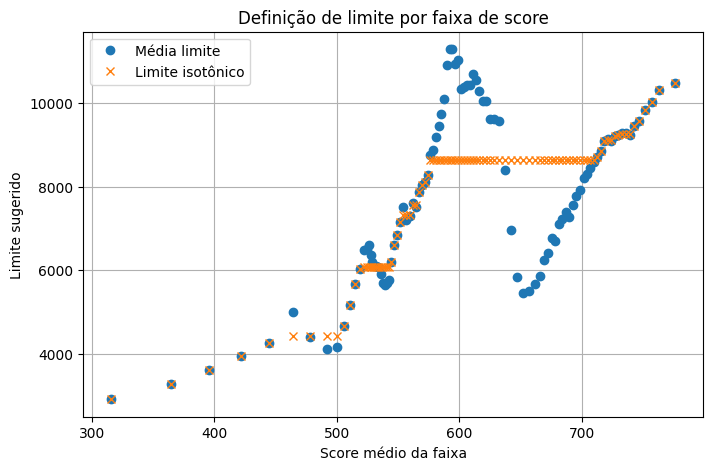

In [128]:
plot.figure(figsize=(8,5))
plot.plot(resultados["media_scr"], resultados["media_limite"], marker="o", linestyle="", label="Média limite")
plot.plot(resultados["media_scr"], resultados["media_limite_isotonico"], marker="x", linestyle="", label="Limite isotônico")
plot.xlabel("Score médio da faixa")
plot.ylabel("Limite sugerido")
plot.title("Definição de limite por faixa de score")
plot.legend()
plot.grid(True)
plot.show()

In [129]:
relatorio_limites_train=relatorio_prob_inad_train.merge(resultados[["fx_risco","media_limite_isotonico"]],on="fx_risco", how="left")
relatorio_limites_train["fx_risco"]=relatorio_limites_train["fx_risco"].astype("category")

## Teste

In [130]:
bins_risco_carregado = np.load(r"bins_risco.npy")
relatorio_prob_inad_test["fx_risco"]=pd.cut(relatorio_prob_inad_test.SCR, bins=bins_risco_carregado)

In [131]:
relatorio_limites_test=relatorio_prob_inad_test.merge(resultados[["fx_risco","media_limite_isotonico"]],on="fx_risco", how="left")